In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
plt.style.use('plot_style-Examples.txt')

In [3]:
from scipy import io
import numpy as np

import matplotlib.pyplot as plt



from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.decomposition import PCA

from tqdm import tqdm

In [4]:
def get_data(filename):
    nx = 40
    nt = 40
    data = np.load(filename)
    x = data["x"].astype(np.float64)
    t = data["t"].astype(np.float64)
    u = data["u"].astype(np.float64)  # N x nt x nx

    u0 = u[:, 0, :]  # N x nx
    xt = np.vstack((np.ravel(x), np.ravel(t))).T
    return u0, u[:, int(nt/2), :], xt
    
    #u = u.reshape(-1, nt * nx)
    return u0 , u, xt

In [5]:
x_train, y_train, xt= get_data("train_IC1.npz")
x_test, y_test, xt = get_data("test_IC1.npz")

x_train.shape, y_train.shape, xt.shape

((1000, 40), (1000, 40), (1600, 2))

In [6]:
idx = 20
Input1d = x_test[idx]
Output1d = y_test[idx]

grid = np.linspace(0,1, 40)

In [7]:
#Save your figures with plt.savefig('InputAdvection.pdf')

In [8]:
#Advection

In [9]:
#Save your figures with plt.savefig('InputAdvection.pdf')

In [10]:
#Advection

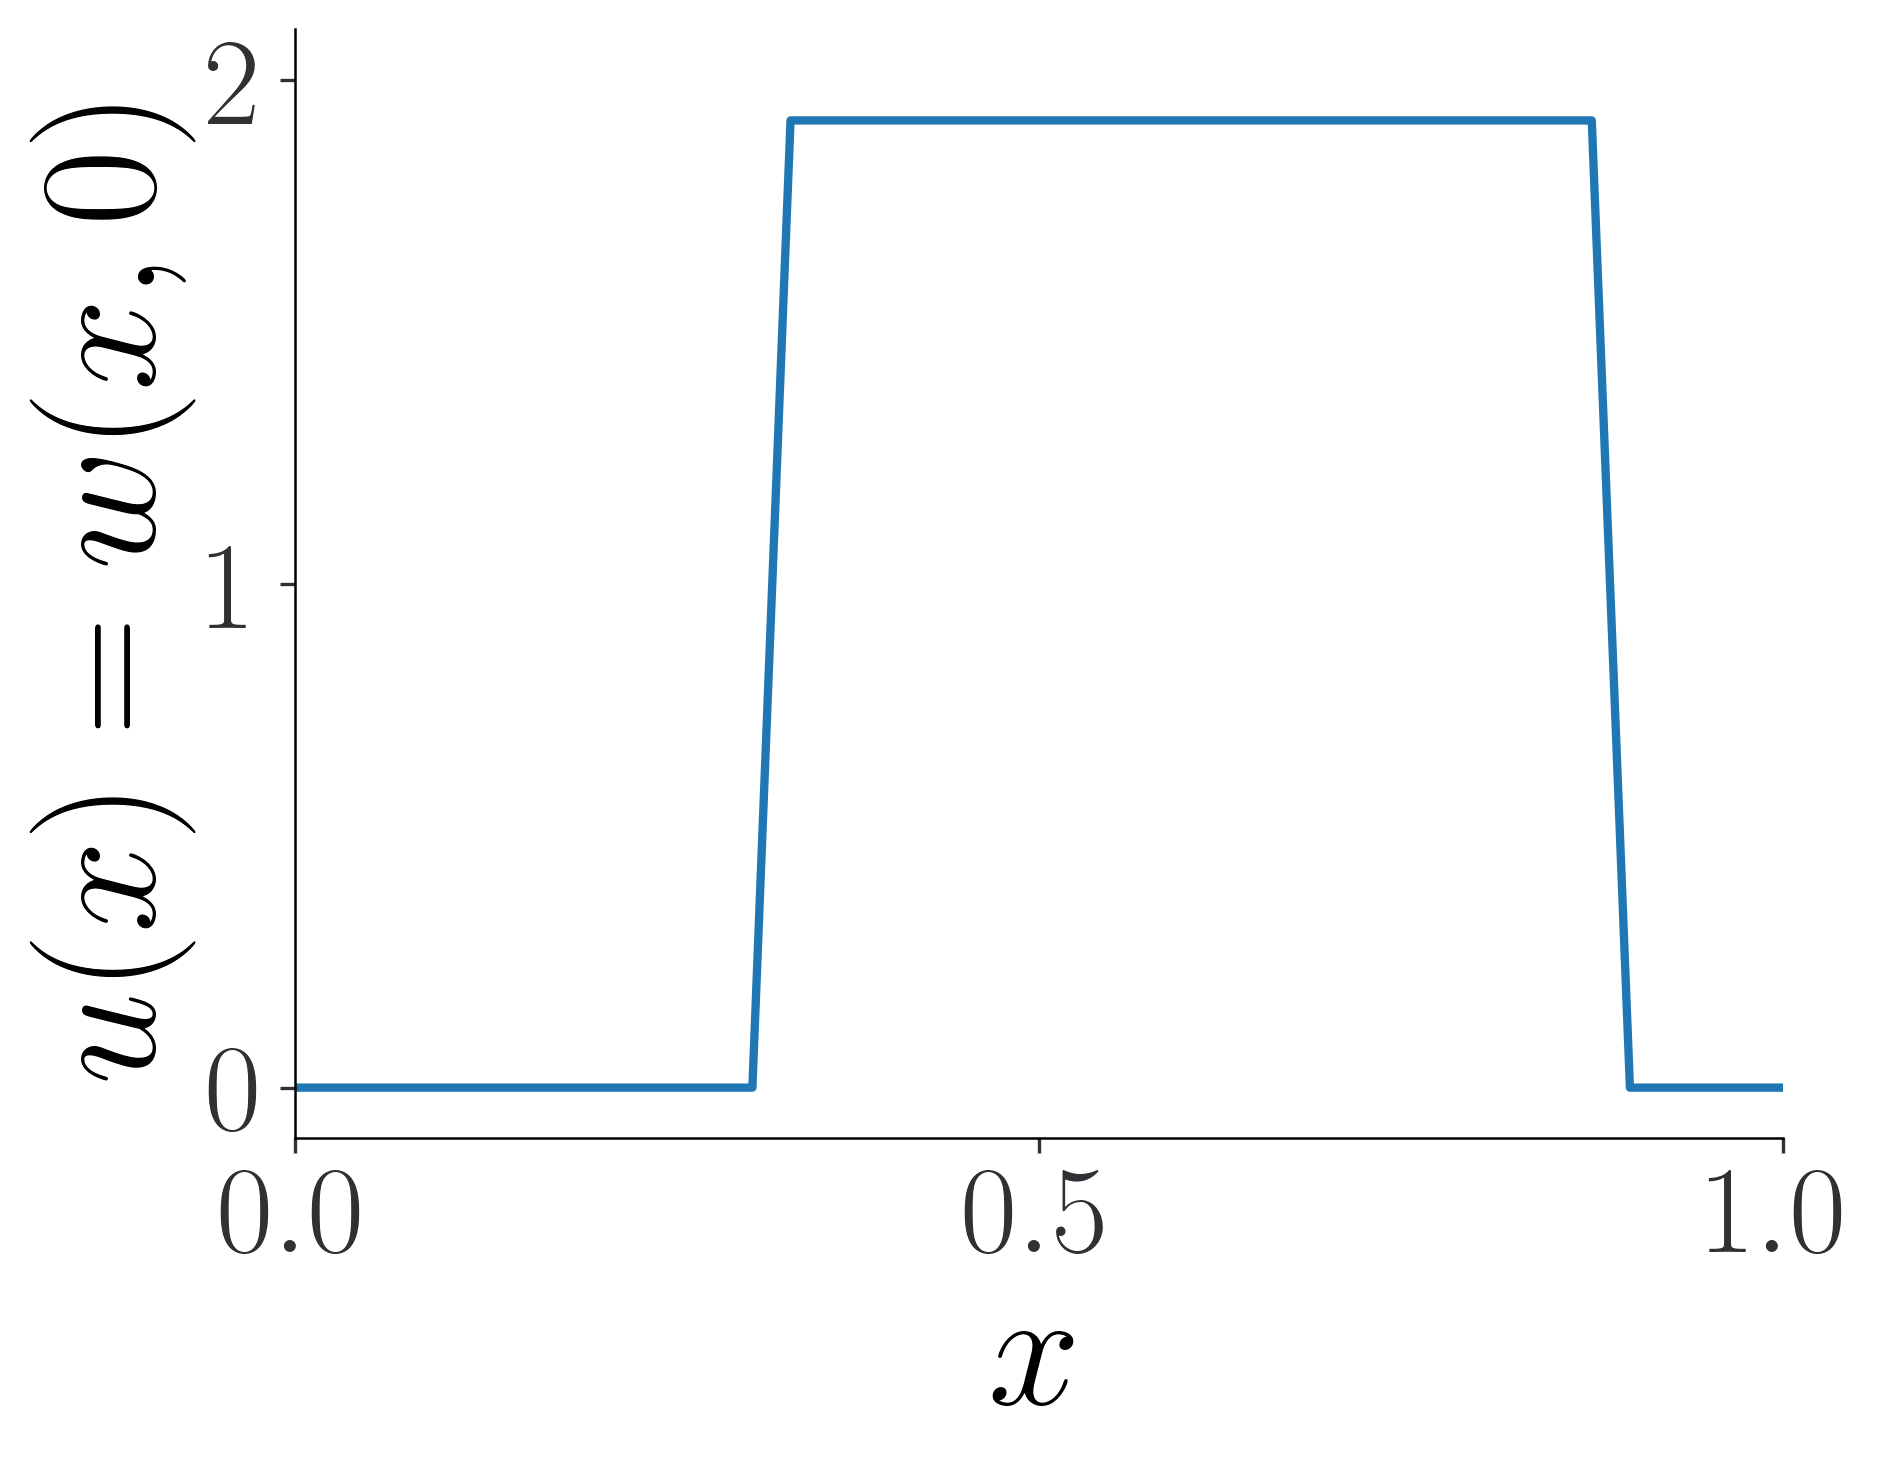

In [11]:
fig, ax = plt.subplots(1,1)
#fig.add_subplot(111, frameon=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u(x) = w(x, 0)$') #or similar
#fig.suptitle(r'Input, Advection II')
plt.ylim(-0.1, 2.1)
plt.xlim(0,1)
ax.plot(grid, Input1d)
plt.savefig('InputAdvection.pdf', bbox_inches = 'tight')#)

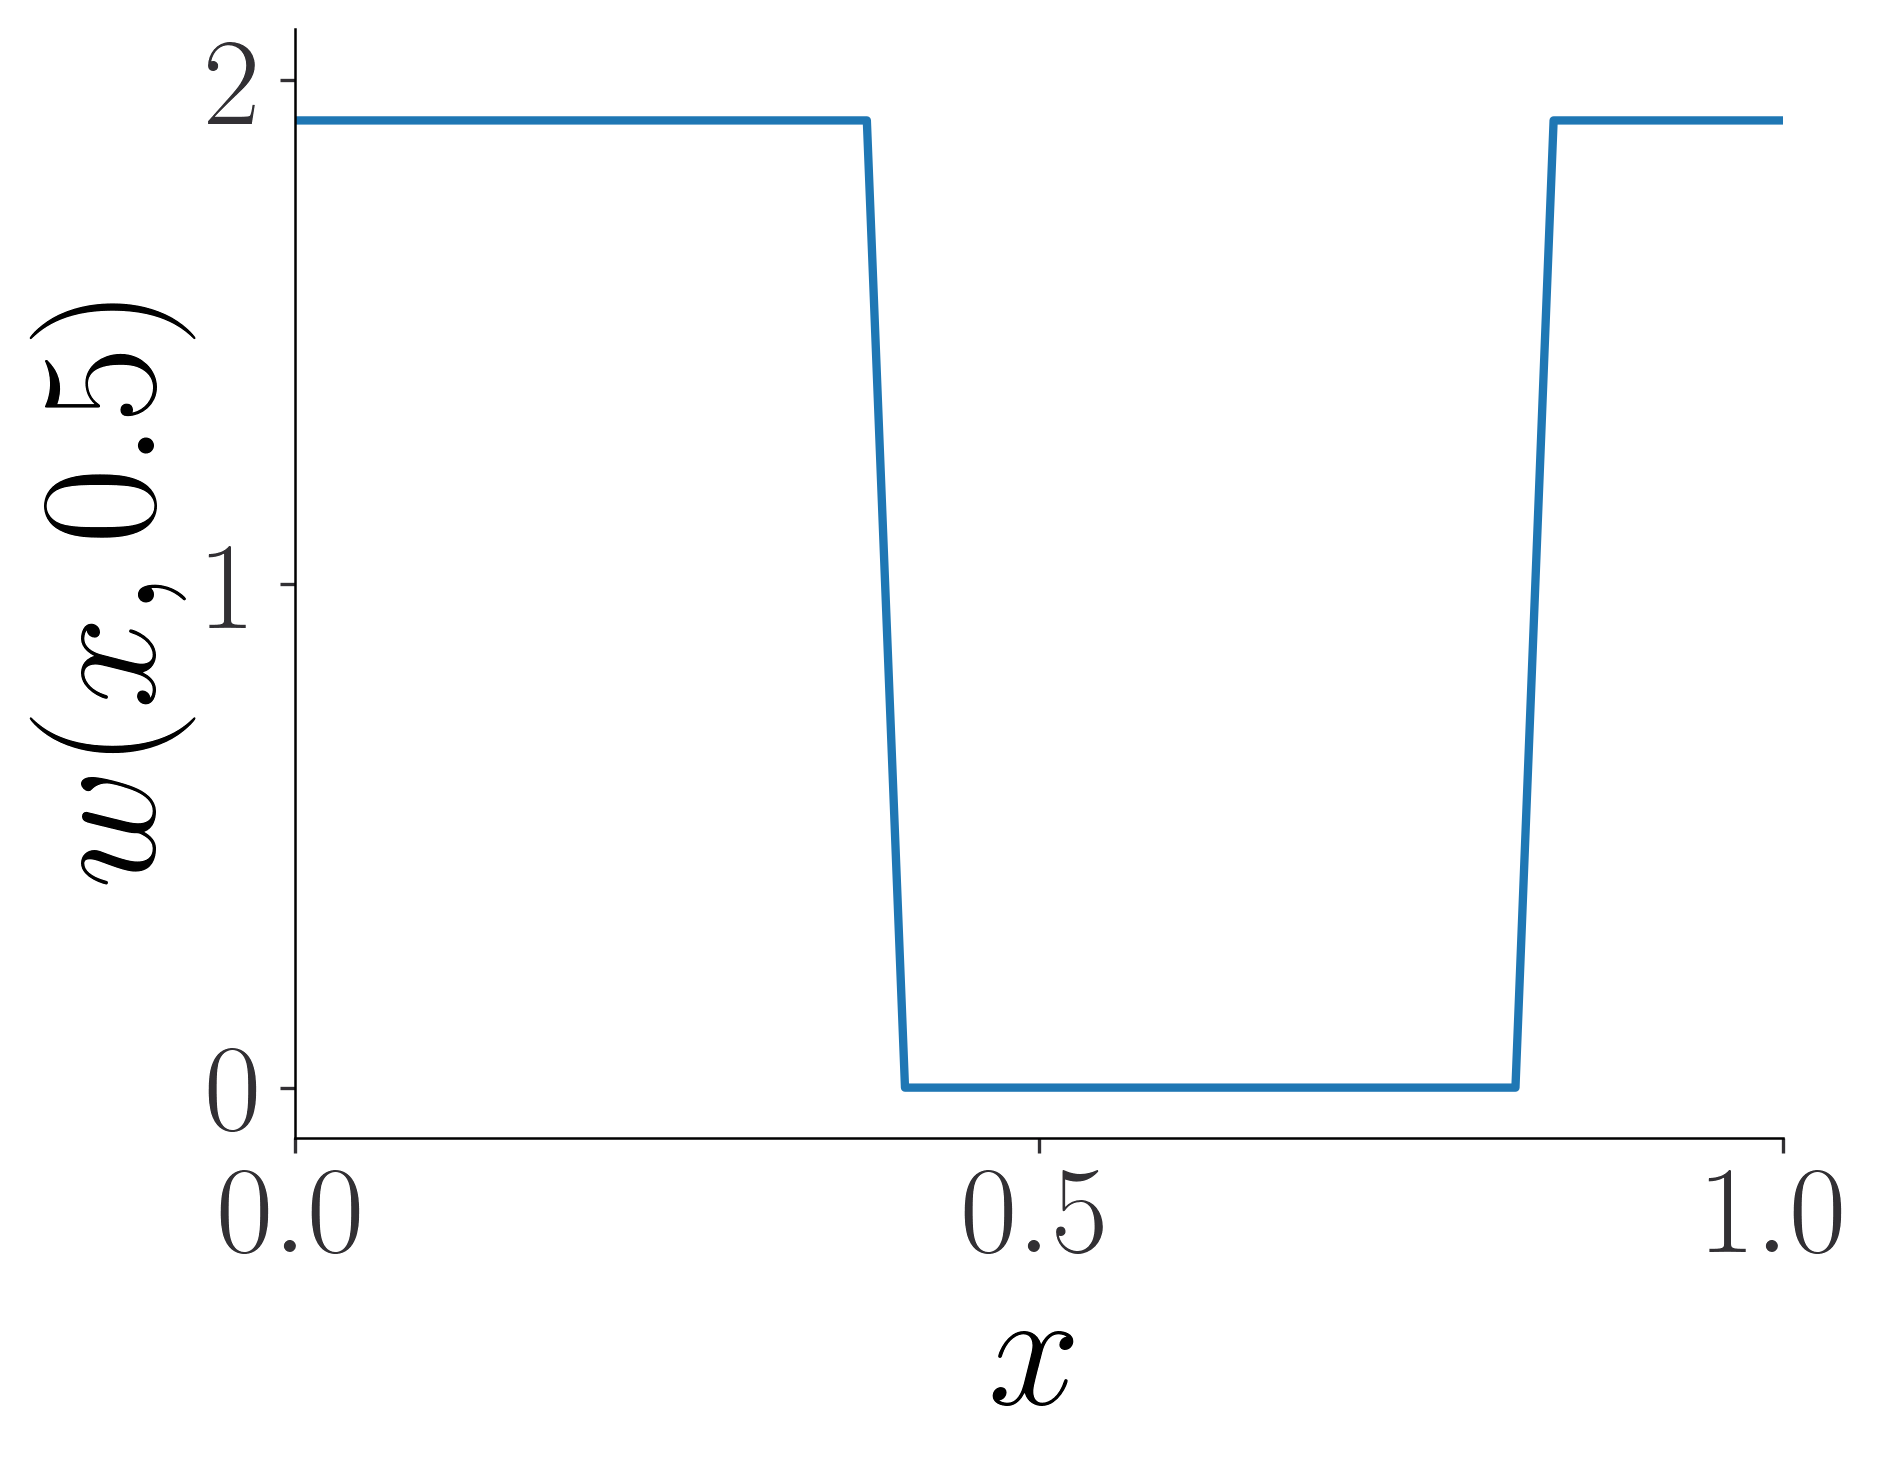

In [12]:
fig, ax = plt.subplots(1,1)
#fig.add_subplot(111, frameon=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$w(x, 0.5)$') #or similar
plt.ylim(-0.1, 2.1)
plt.xlim(0,1)
ax.plot(grid, Output1d)
plt.savefig('OutputAdvection.pdf', bbox_inches = 'tight')

In [13]:
def train_test(x_train, x_test, y_train, y_test, n_pca, model):
    # Compute the PCA decoposition
    pca = PCA(n_components=n_pca)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)

    
    model.fit(x_train_pca, y_train)
    pred= model.predict(x_test_pca)
    #pred_train = gp.predict(x_train)

    #e = compute_error_dataset(y_test, pred, knots, k)

    return pred, model

In [14]:
n_pca = 39
model = LinearRegression()
pred, model = train_test(x_train, x_test, y_train, y_test, n_pca, model)
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

e

1.7806042330974397e-15

In [15]:
idx = 120
x_true = x_test[idx]
y_true = y_test[idx]
y_pred = pred[idx]

diff = -(y_true - y_pred)
diff.shape

(40,)

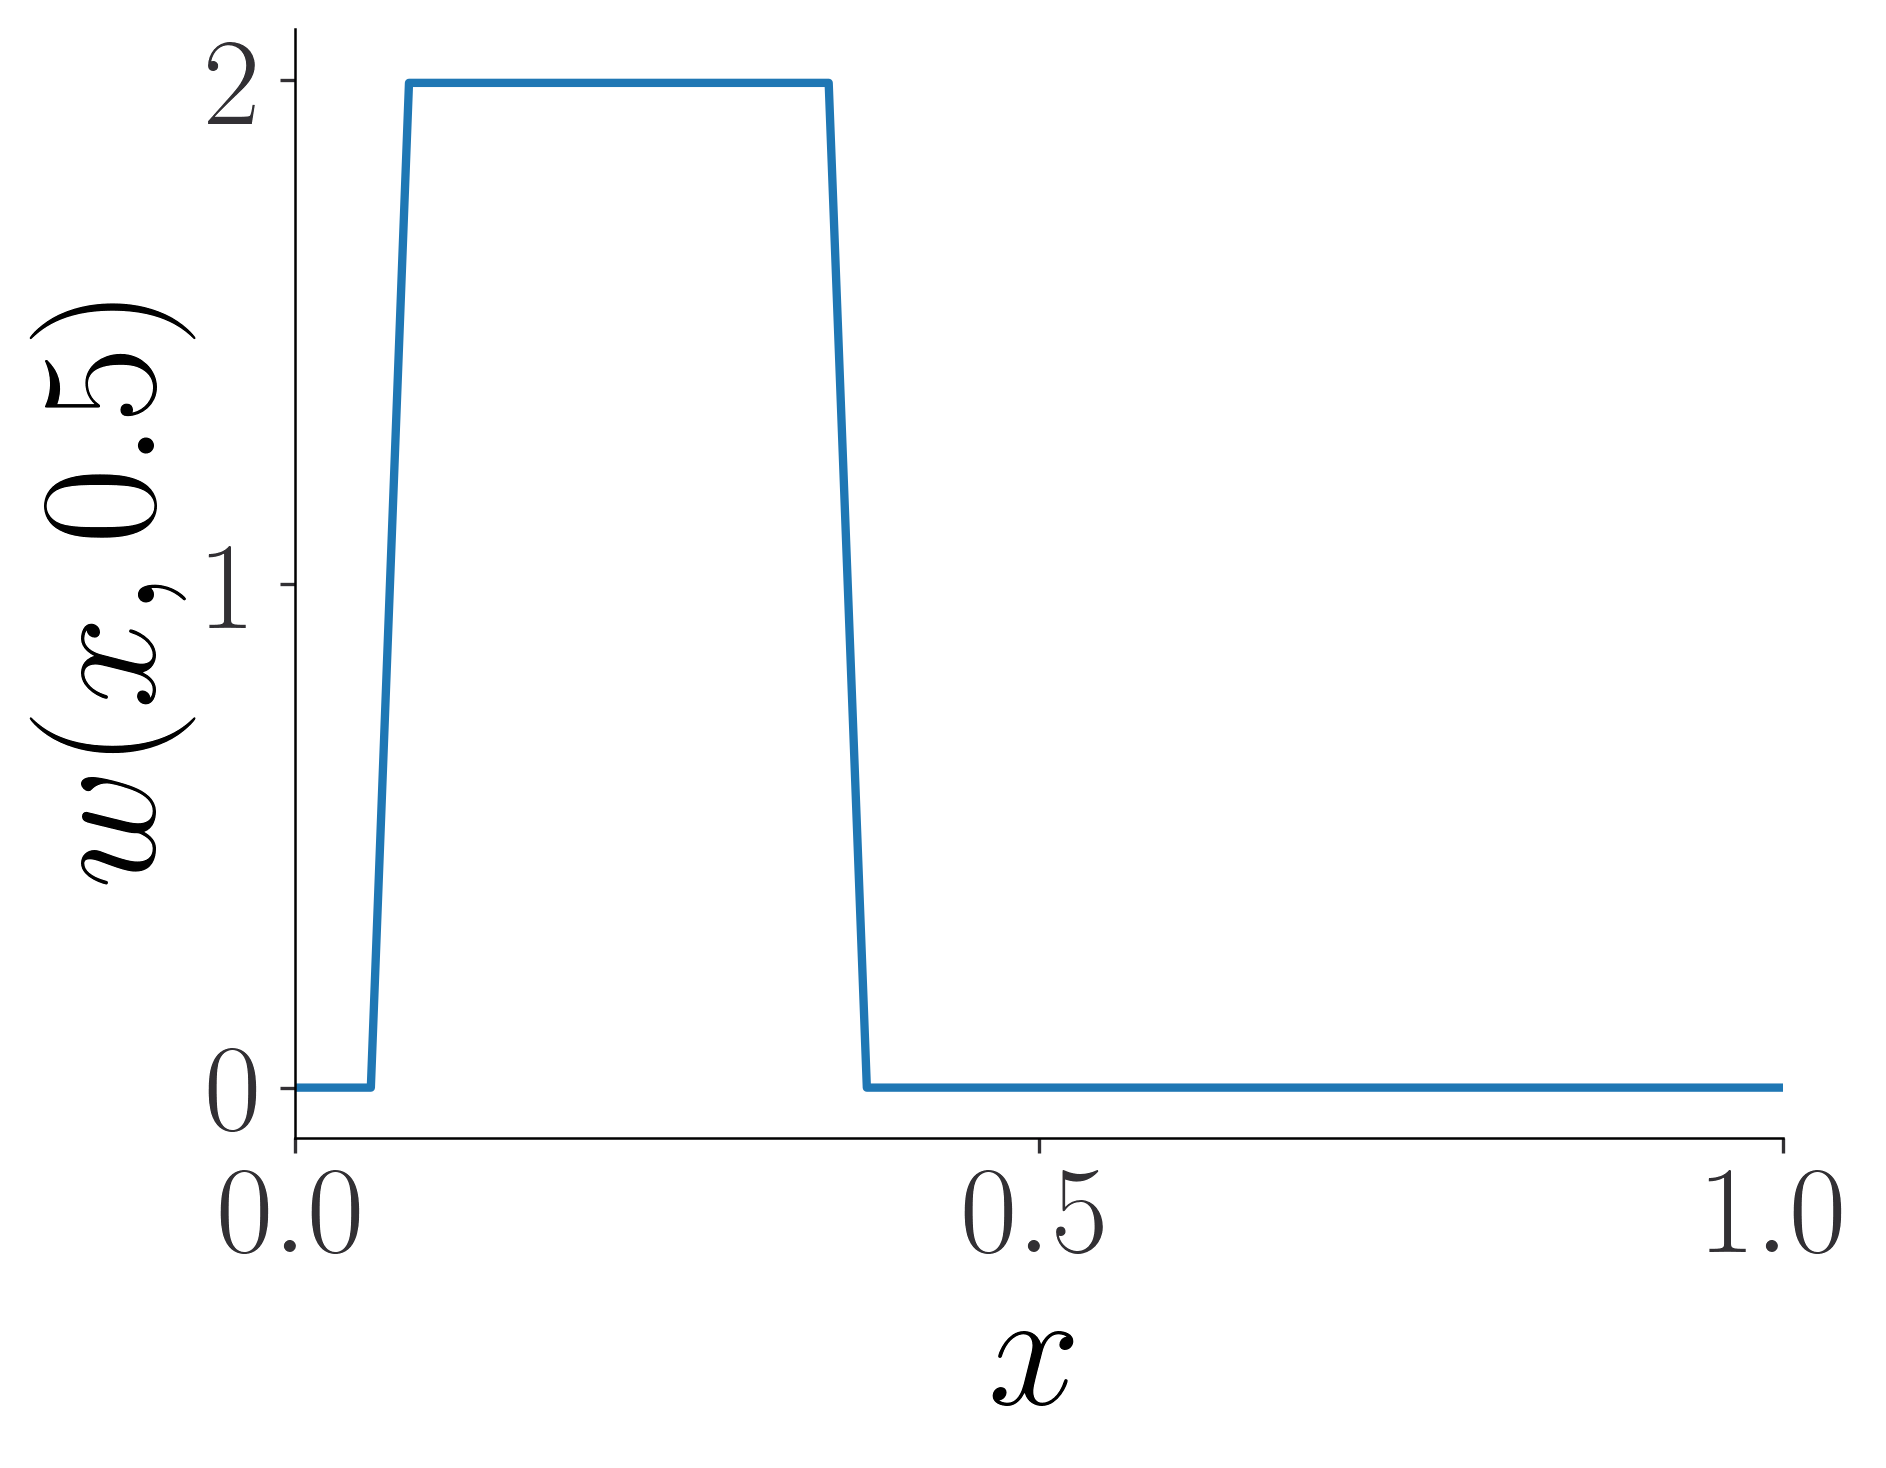

In [16]:
fig, ax = plt.subplots(1,1)
#fig.add_subplot(111, frameon=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$w(x, 0.5)$') #or similar
plt.ylim(-0.1, 2.1)
plt.xlim(0,1)
ax.plot(grid, y_true)
plt.savefig('TrueAdvection.pdf', bbox_inches = 'tight')

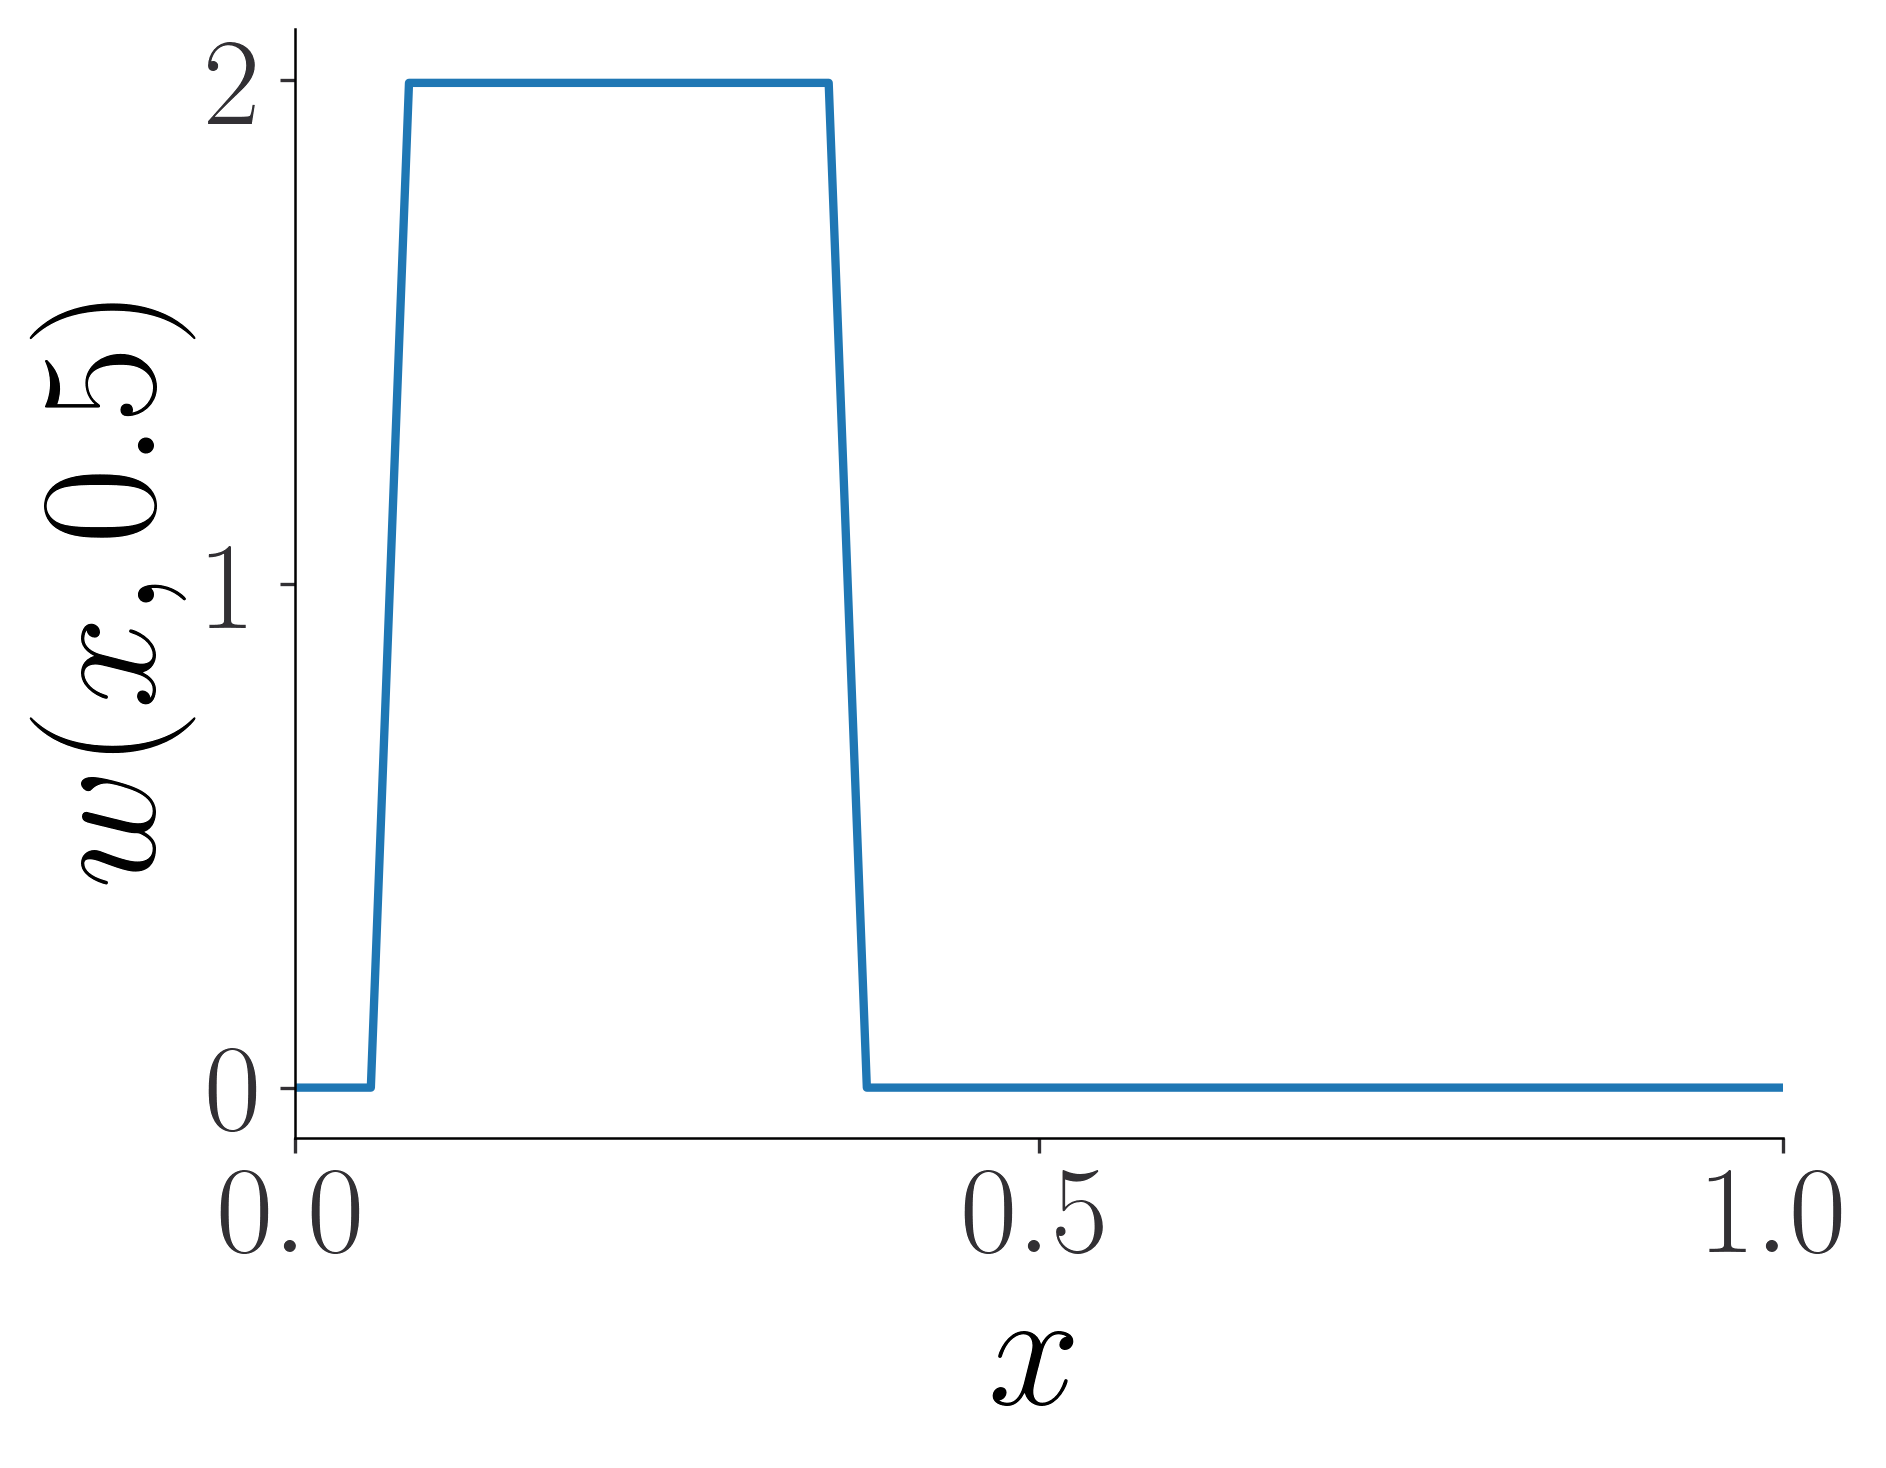

In [17]:
fig, ax = plt.subplots(1,1)
#fig.add_subplot(111, frameon=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$w(x, 0.5)$') #or similar
plt.ylim(-0.1, 2.1)
plt.xlim(0,1)
ax.plot(grid, y_pred)
plt.savefig('PredictedAdvection.pdf', bbox_inches = 'tight')

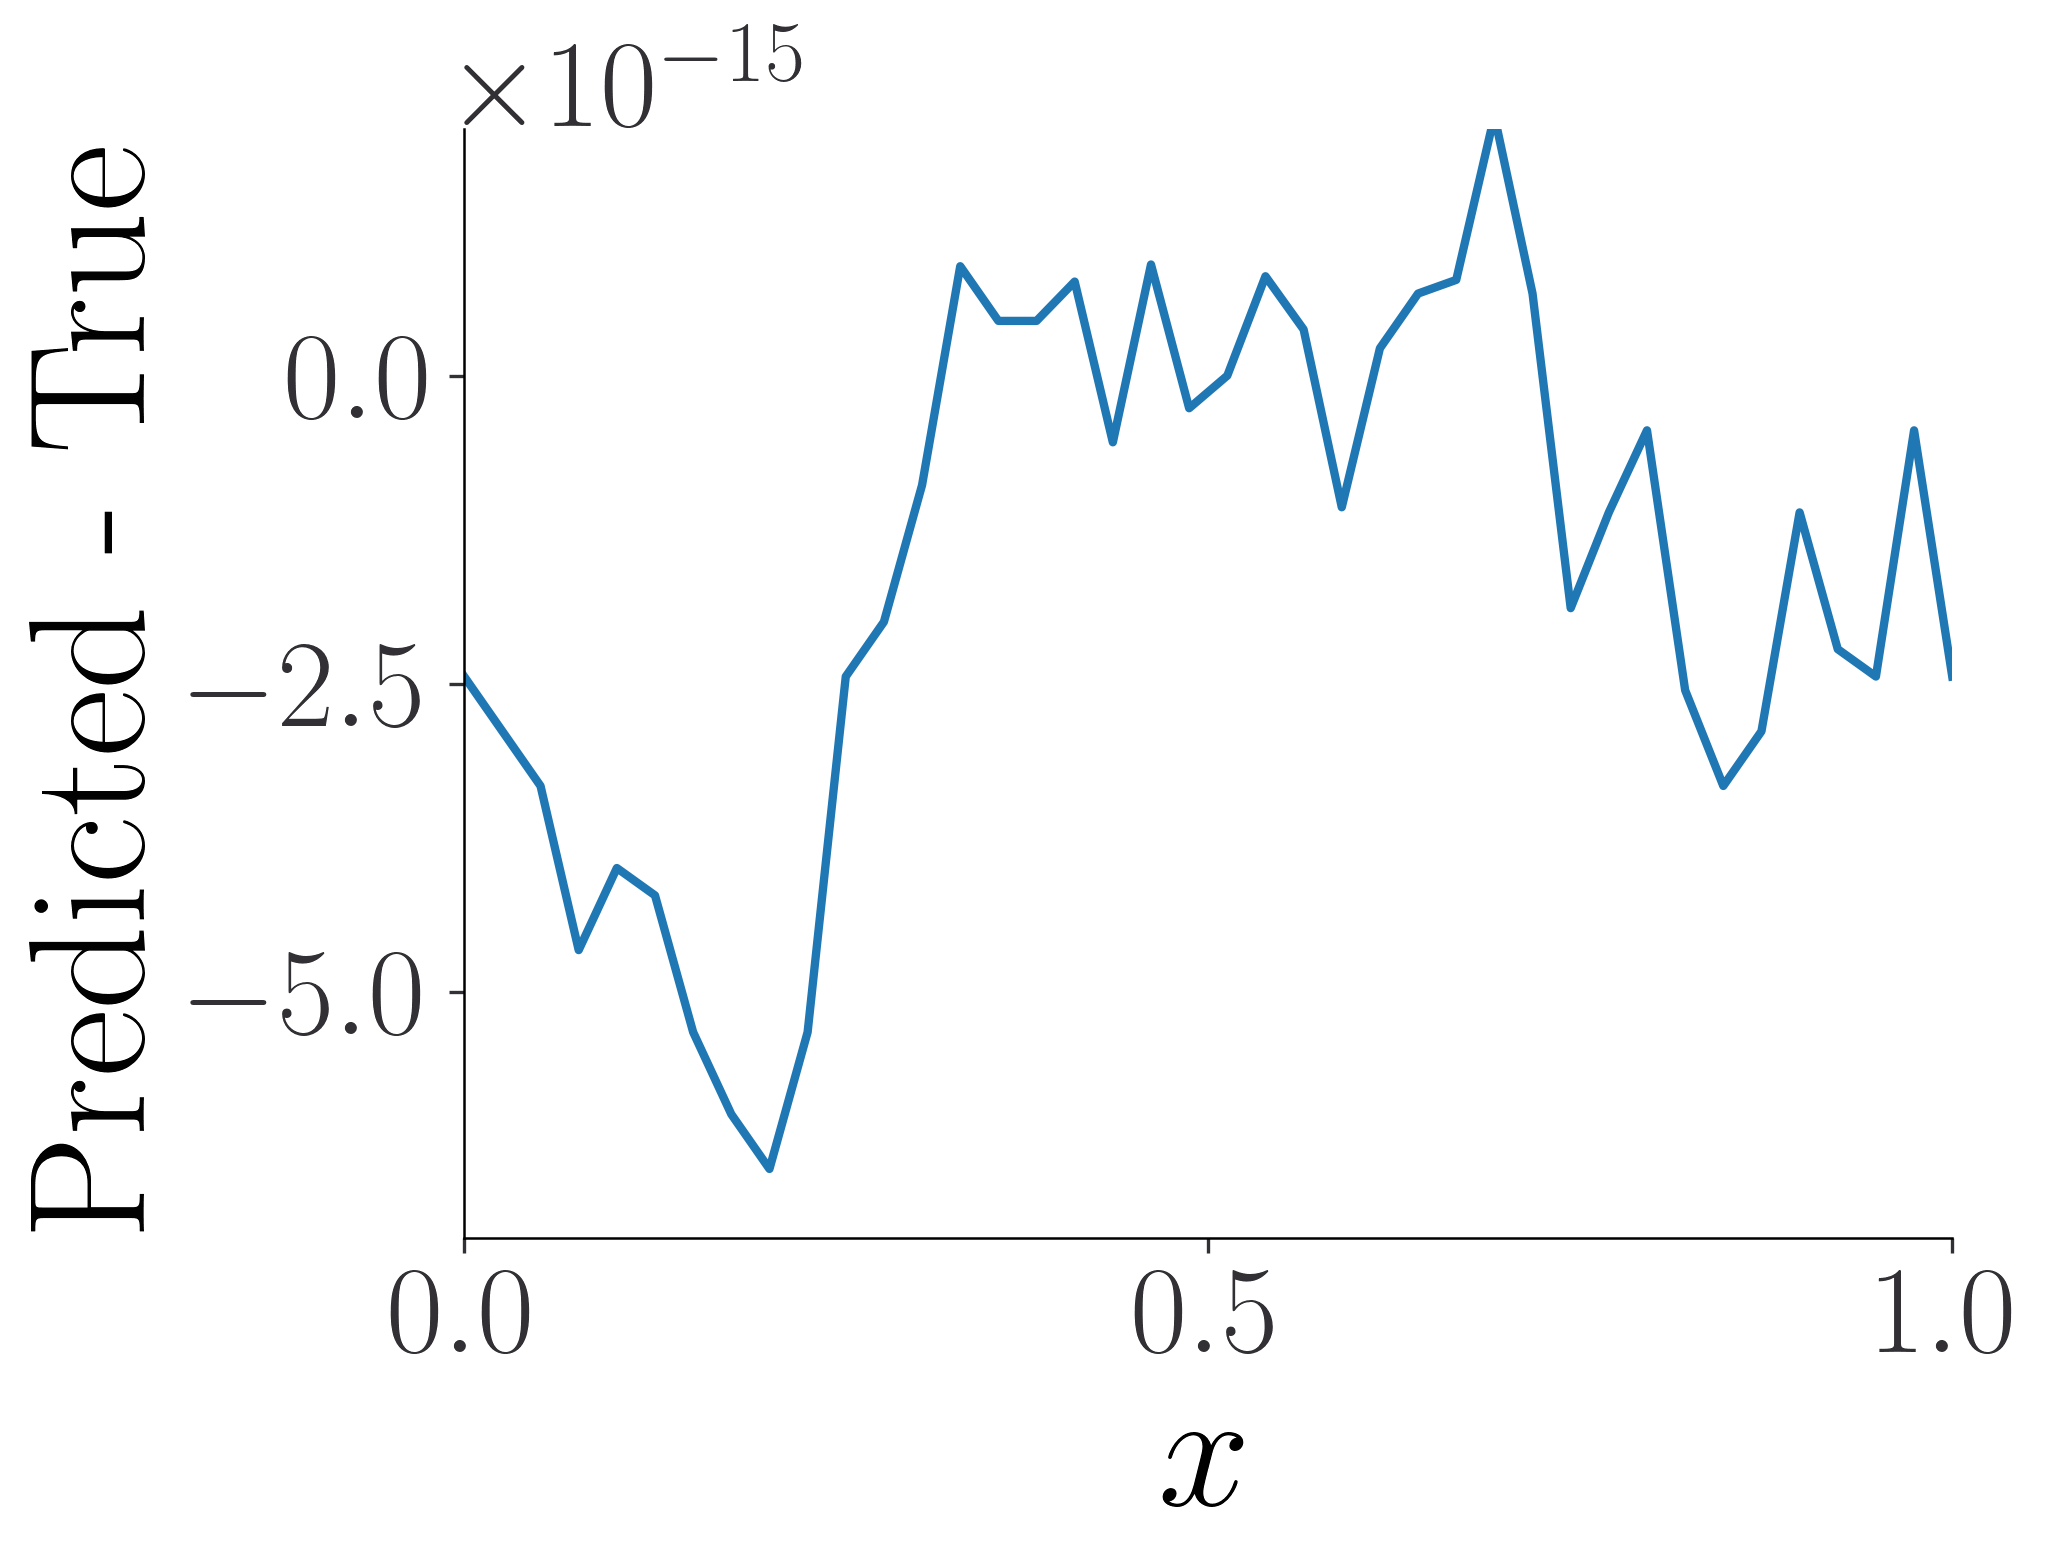

In [21]:
fig, ax = plt.subplots(1,1)
#fig.add_subplot(111, frameon=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'Predicted - True') #or similar
plt.ylim(-0.7*1e-14, 0.2*1e-14)
plt.xlim(0,1)
ax.plot(grid, y_pred-y_true)
plt.savefig('ErrorAdvection.pdf', bbox_inches = 'tight')

In [35]:
# fig, ax = plt.subplots(1,1)
# #fig.add_subplot(111, frameon=False)
# fig.supxlabel(r'$x$')
# fig.supylabel(r'Predicted - True') #or similar
# fig.suptitle(r'Error profile, Advection II')
# plt.ylim(-1.1, 1.1)
# ax.plot(np.linspace(0,1,200), Ypred-Ytest)
# plt.savefig('ErrorAdvection.pdf')

In [36]:
grid = np.linspace(0,1,200)

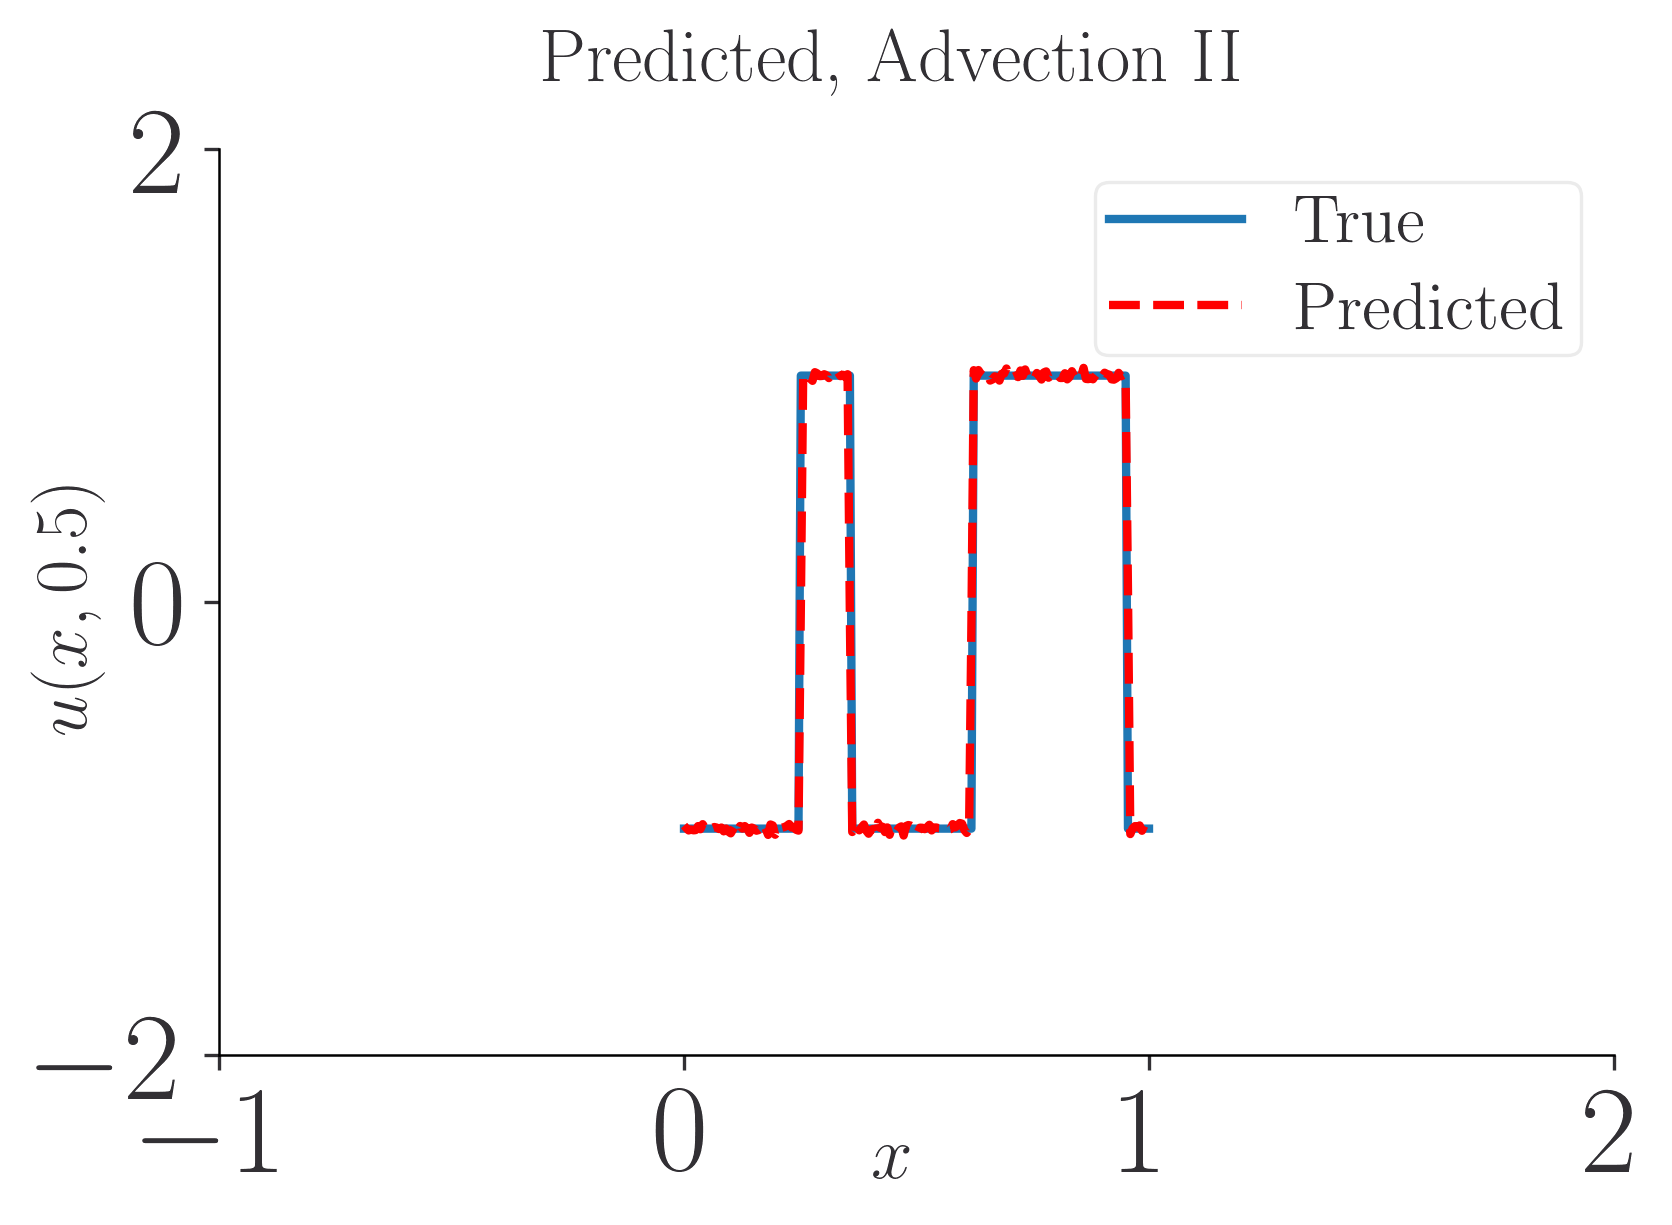

In [37]:
fig, ax = plt.subplots(1,1)
#fig.add_subplot(111, frameon=False)
fig.supxlabel(r'$x$')
fig.supylabel(r'$u(x, 0.5)$') #or similar
fig.suptitle(r'Predicted, Advection II')
#plt.ylim(-1.1, 1.1)
ax.plot(grid, Ytest, label = 'True')
ax.plot(grid, Ypred, '--', color = 'red', label = 'Predicted')
ax.legend()
plt.savefig('OverlayAdvectionII.pdf')

In [38]:
#Navier Stokes

In [85]:
Input2D = np.load('data/NavierStokes_inputs.npy')[:,:,2]
Output2D = np.load('data/NavierStokes_outputs.npy')[:,:,2]

In [40]:
Input2D.shape

(64, 64)

In [41]:
#one has to be careful with 2d because if the (0,0) element of the matrix is the point at the origin of [0,1]^2 
#this will not be the default behaviour, so I vertically flip image

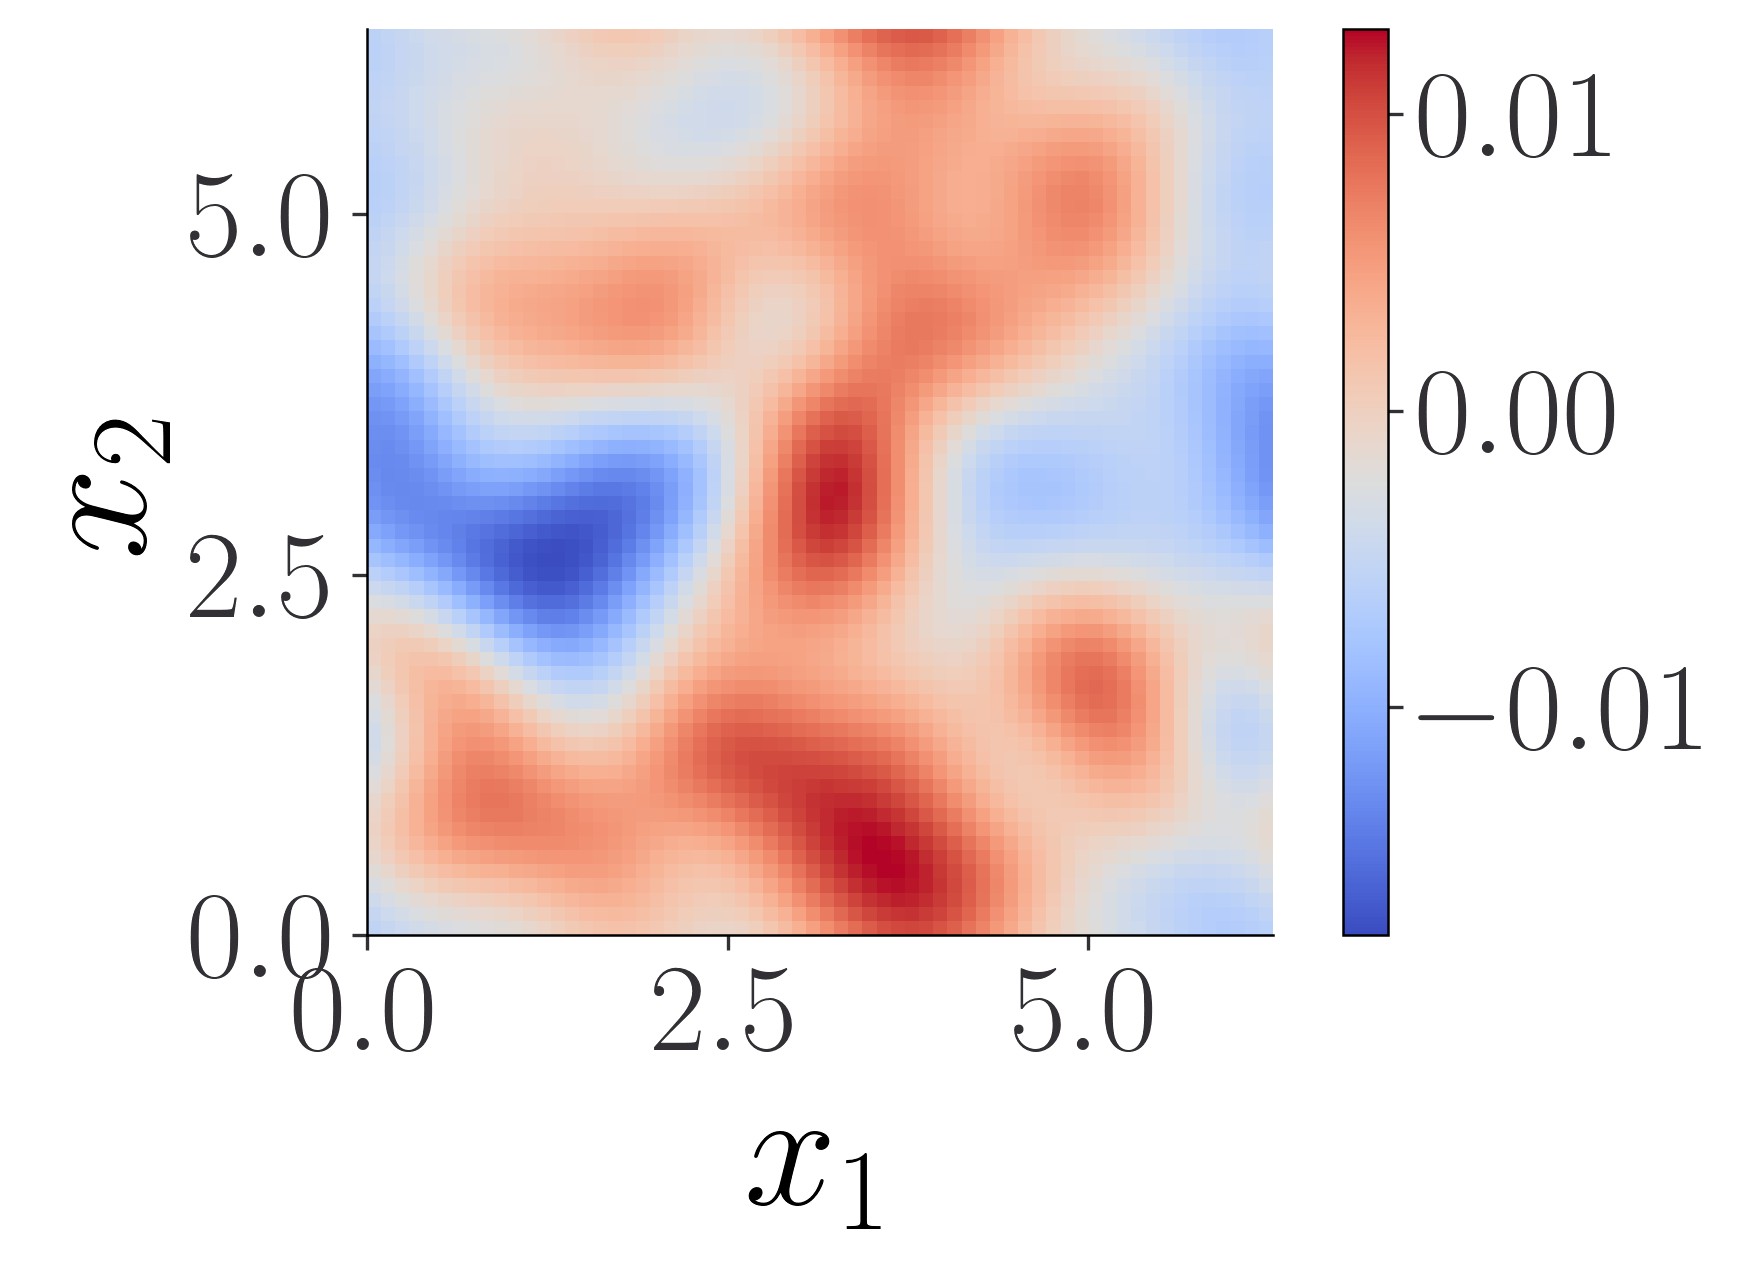

In [86]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Input, Navier Stokes')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Input2D, extent=(0,2*np.pi,0,2*np.pi), origin = 'lower')
ax.set_xticks([0, 2.5, 5])
c = fig.colorbar(s)
plt.savefig('InputNavierStokes.pdf')

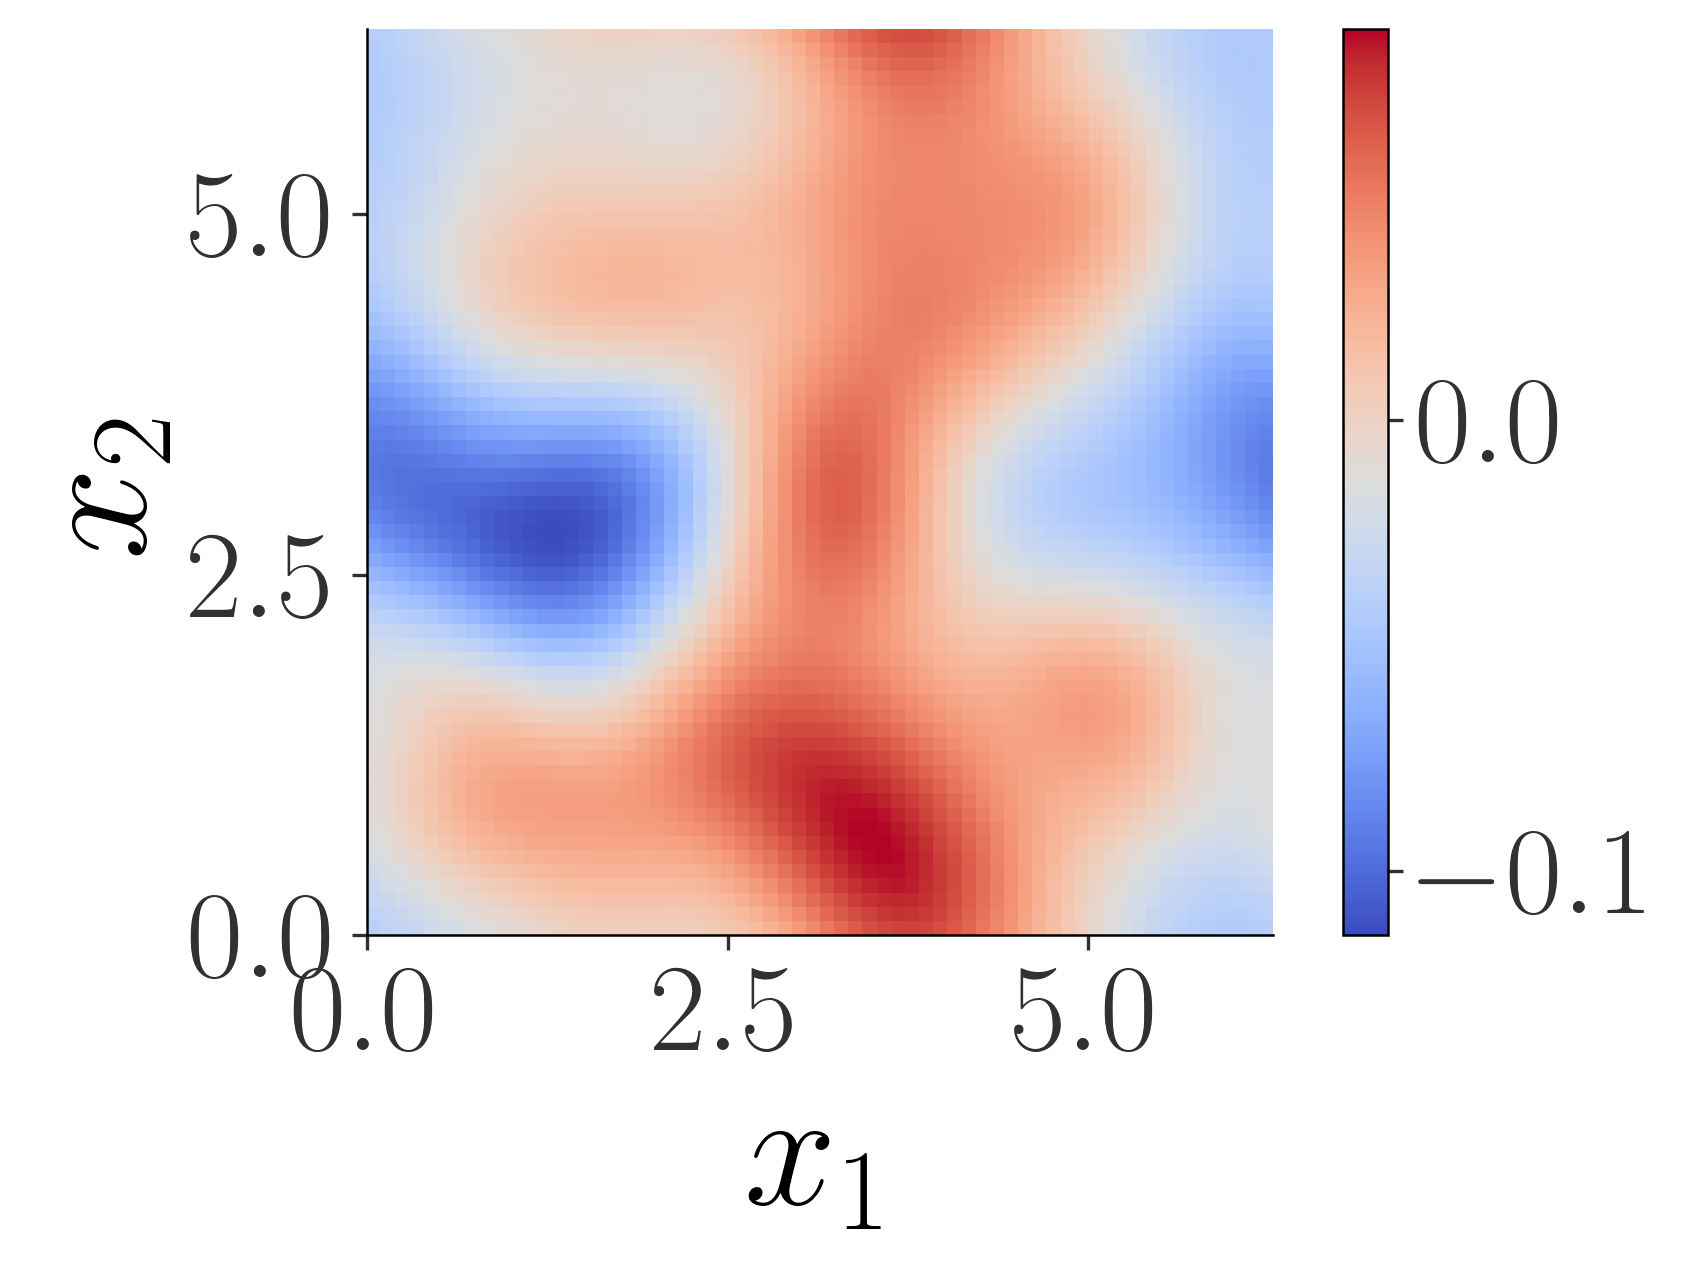

In [87]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Input, Navier Stokes')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Output2D, extent=(0,2*np.pi,0,2*np.pi), origin = 'lower')
ax.set_xticks([0, 2.5, 5])
c = fig.colorbar(s)
plt.savefig('OutputNavierStokes.pdf')

In [63]:
Ytest, Ypred = pickle.load(open('PredictedNS.pkl', 'rb'))

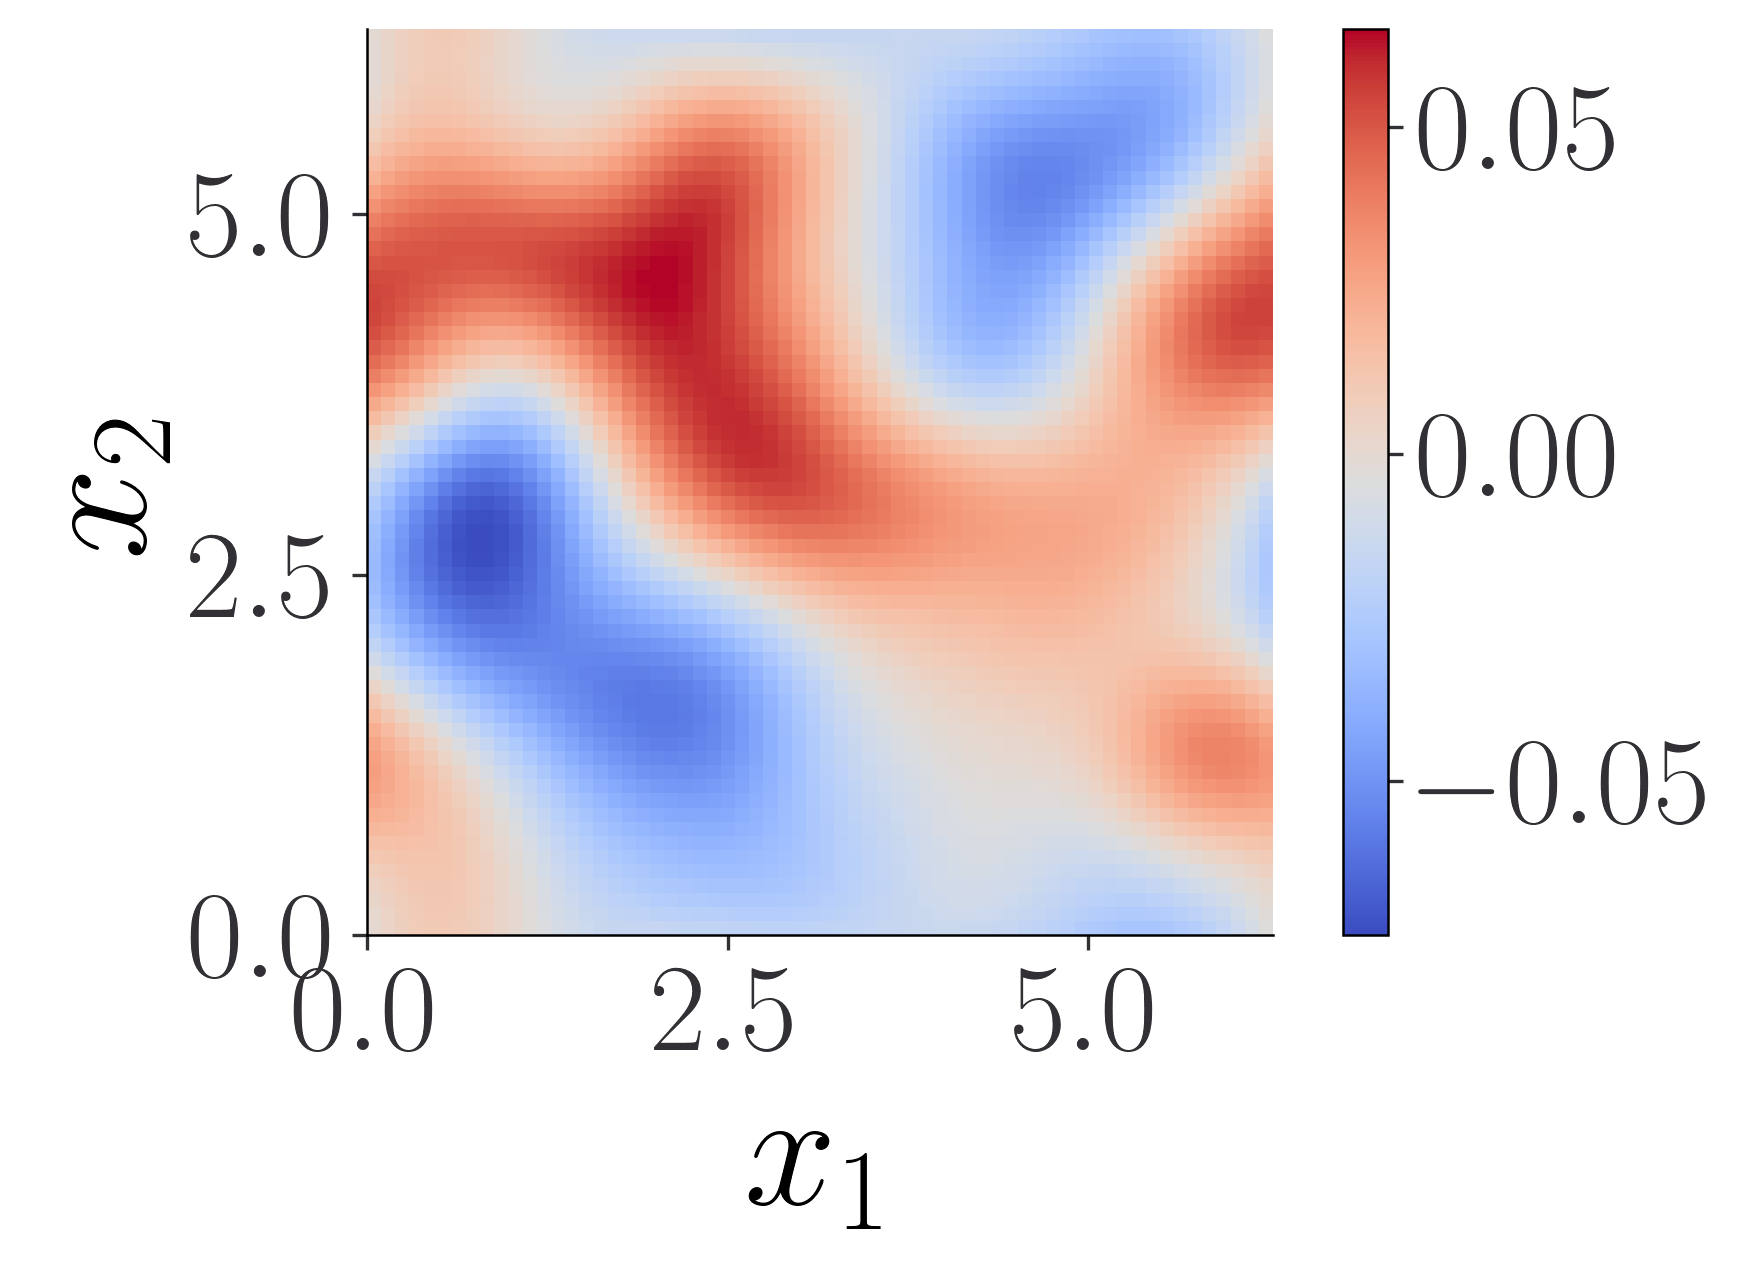

In [65]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Input, Navier Stokes')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ytest.reshape(64,64), extent=(0,2*np.pi,0,2*np.pi), origin = 'lower')
ax.set_xticks([0, 2.5, 5])
c = fig.colorbar(s)
c.set_ticks([-0.05, 0, 0.05])
plt.savefig('TrueNavierStokes.pdf')

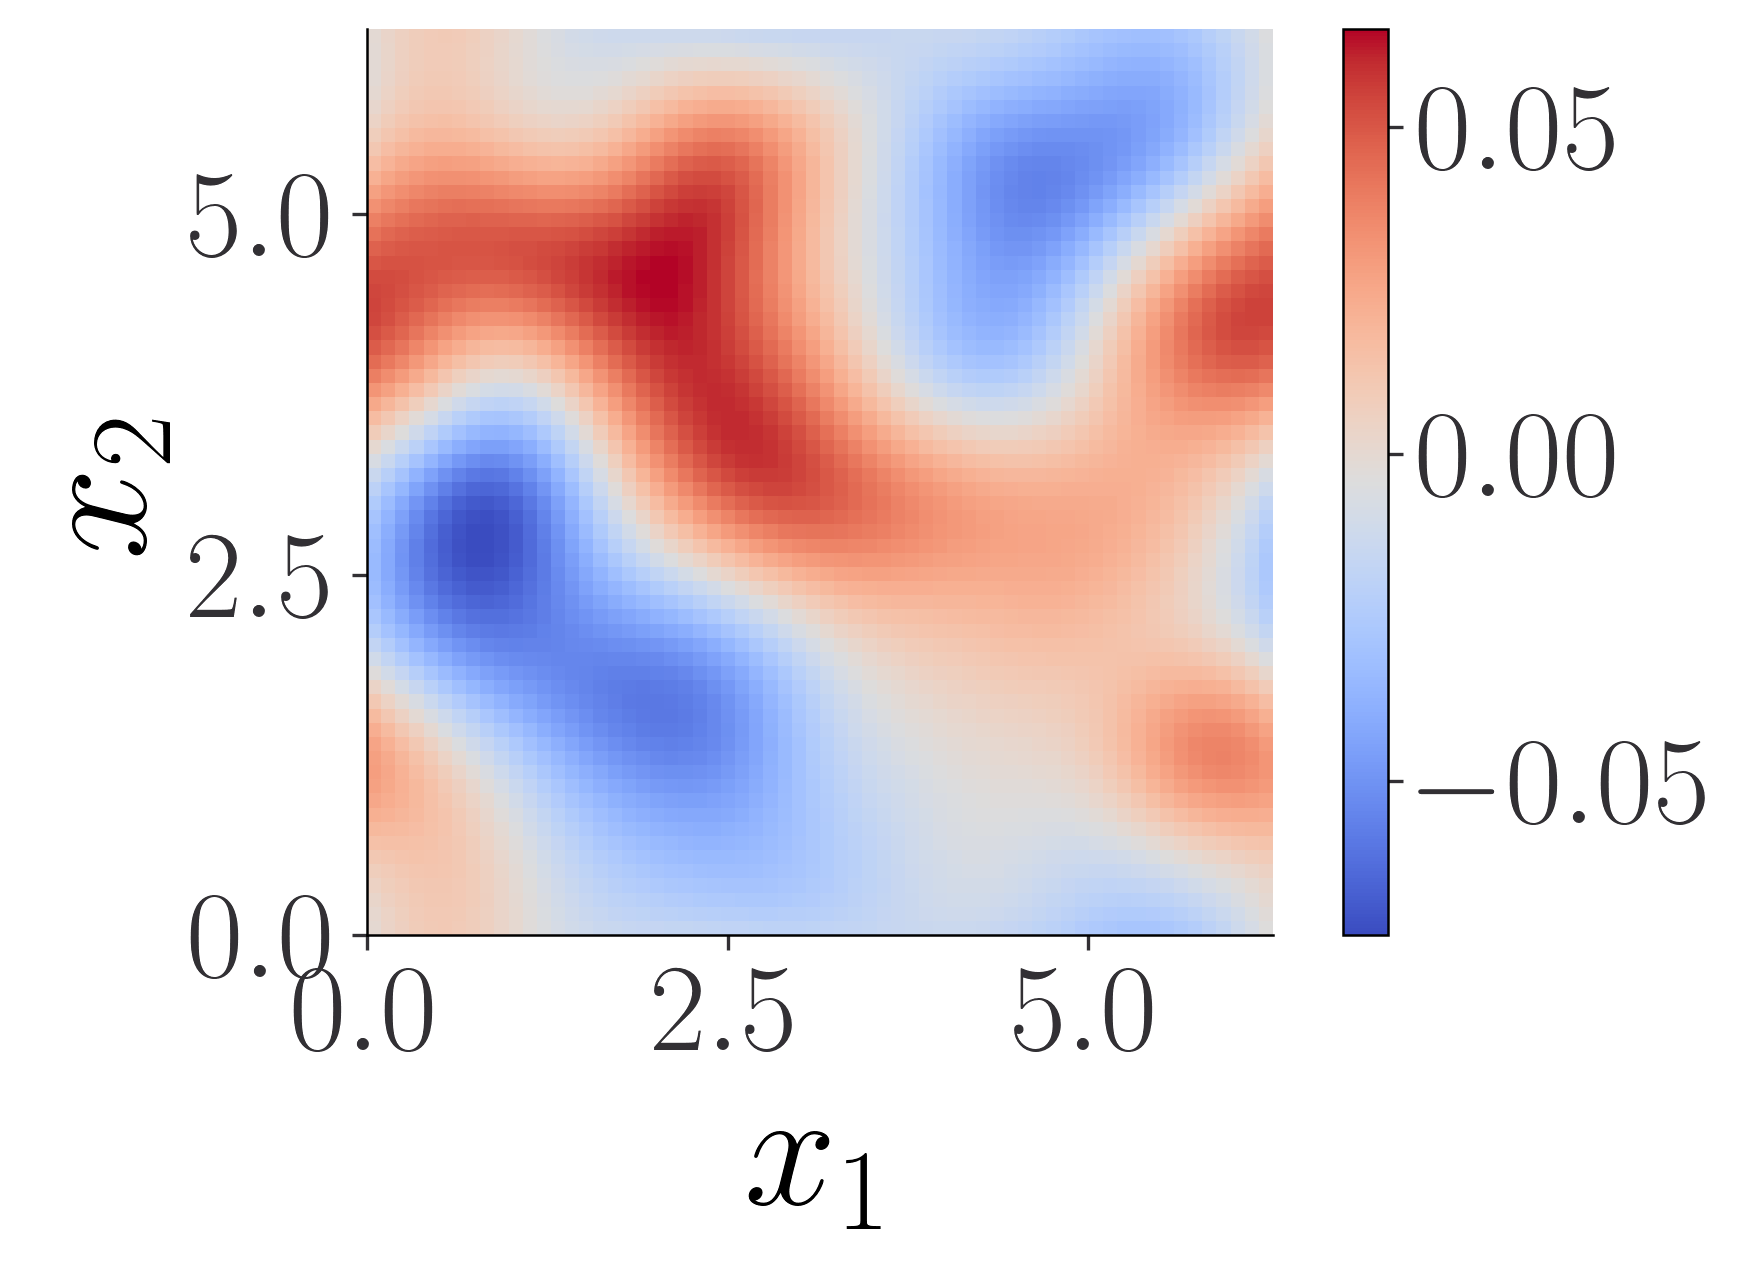

In [66]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Input, Navier Stokes')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ypred.reshape(64,64), extent=(0,2*np.pi,0,2*np.pi), origin = 'lower')
ax.set_xticks([0, 2.5, 5])
c = fig.colorbar(s)
c.set_ticks([-0.05, 0, 0.05])
plt.savefig('PredictedNavierStokes.pdf')

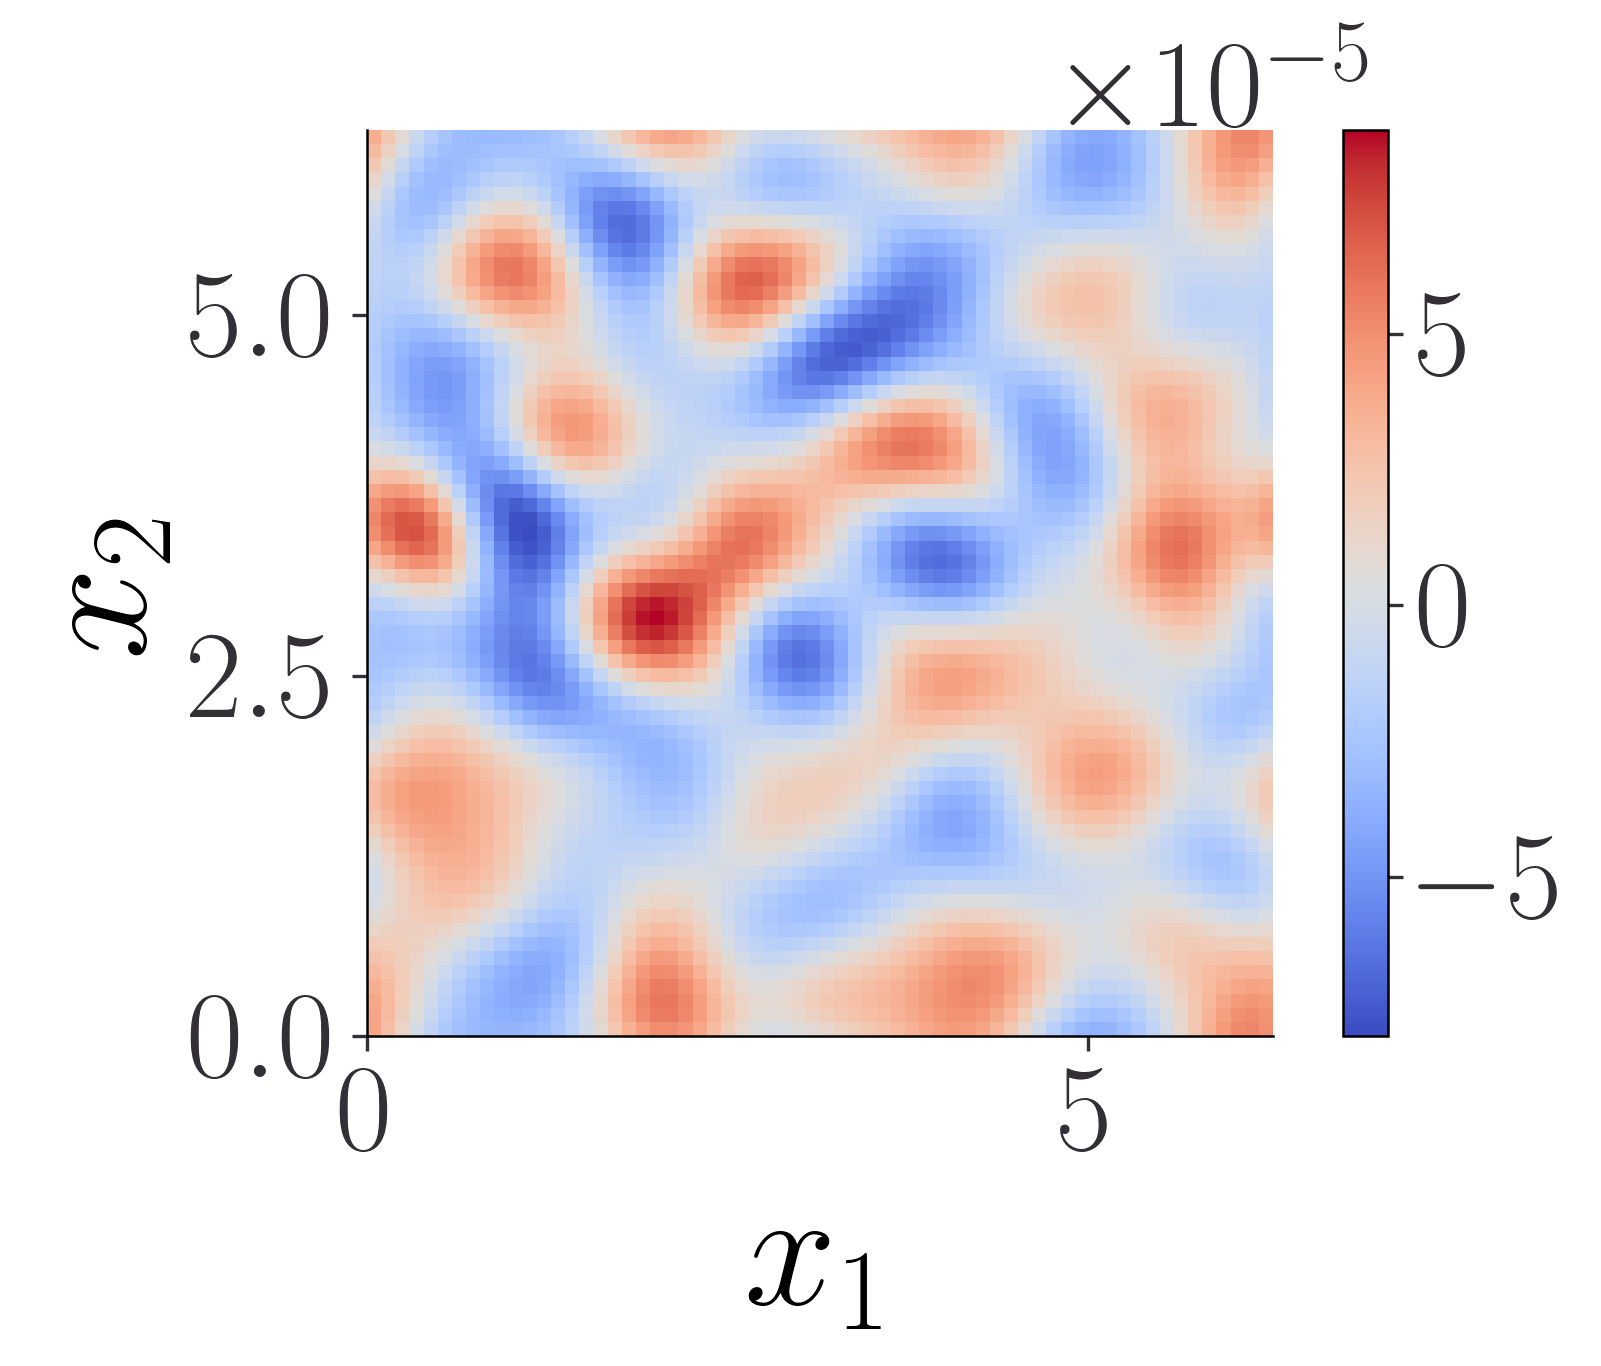

In [67]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Error profile, Navier Stokes')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ypred.reshape(64,64)-Ytest.reshape(64,64), extent=(0,2*np.pi,0,2*np.pi), origin = 'lower')
fig.colorbar(s)
plt.savefig('ErrorNavierStokes.pdf')

In [68]:
#Structural Mechanics

In [69]:
Input2D = np.load('data/StructuralMechanics_inputs.npy')[:,:,4]
Output2D = np.load('data/StructuralMechanics_outputs.npy')[:,:,4]

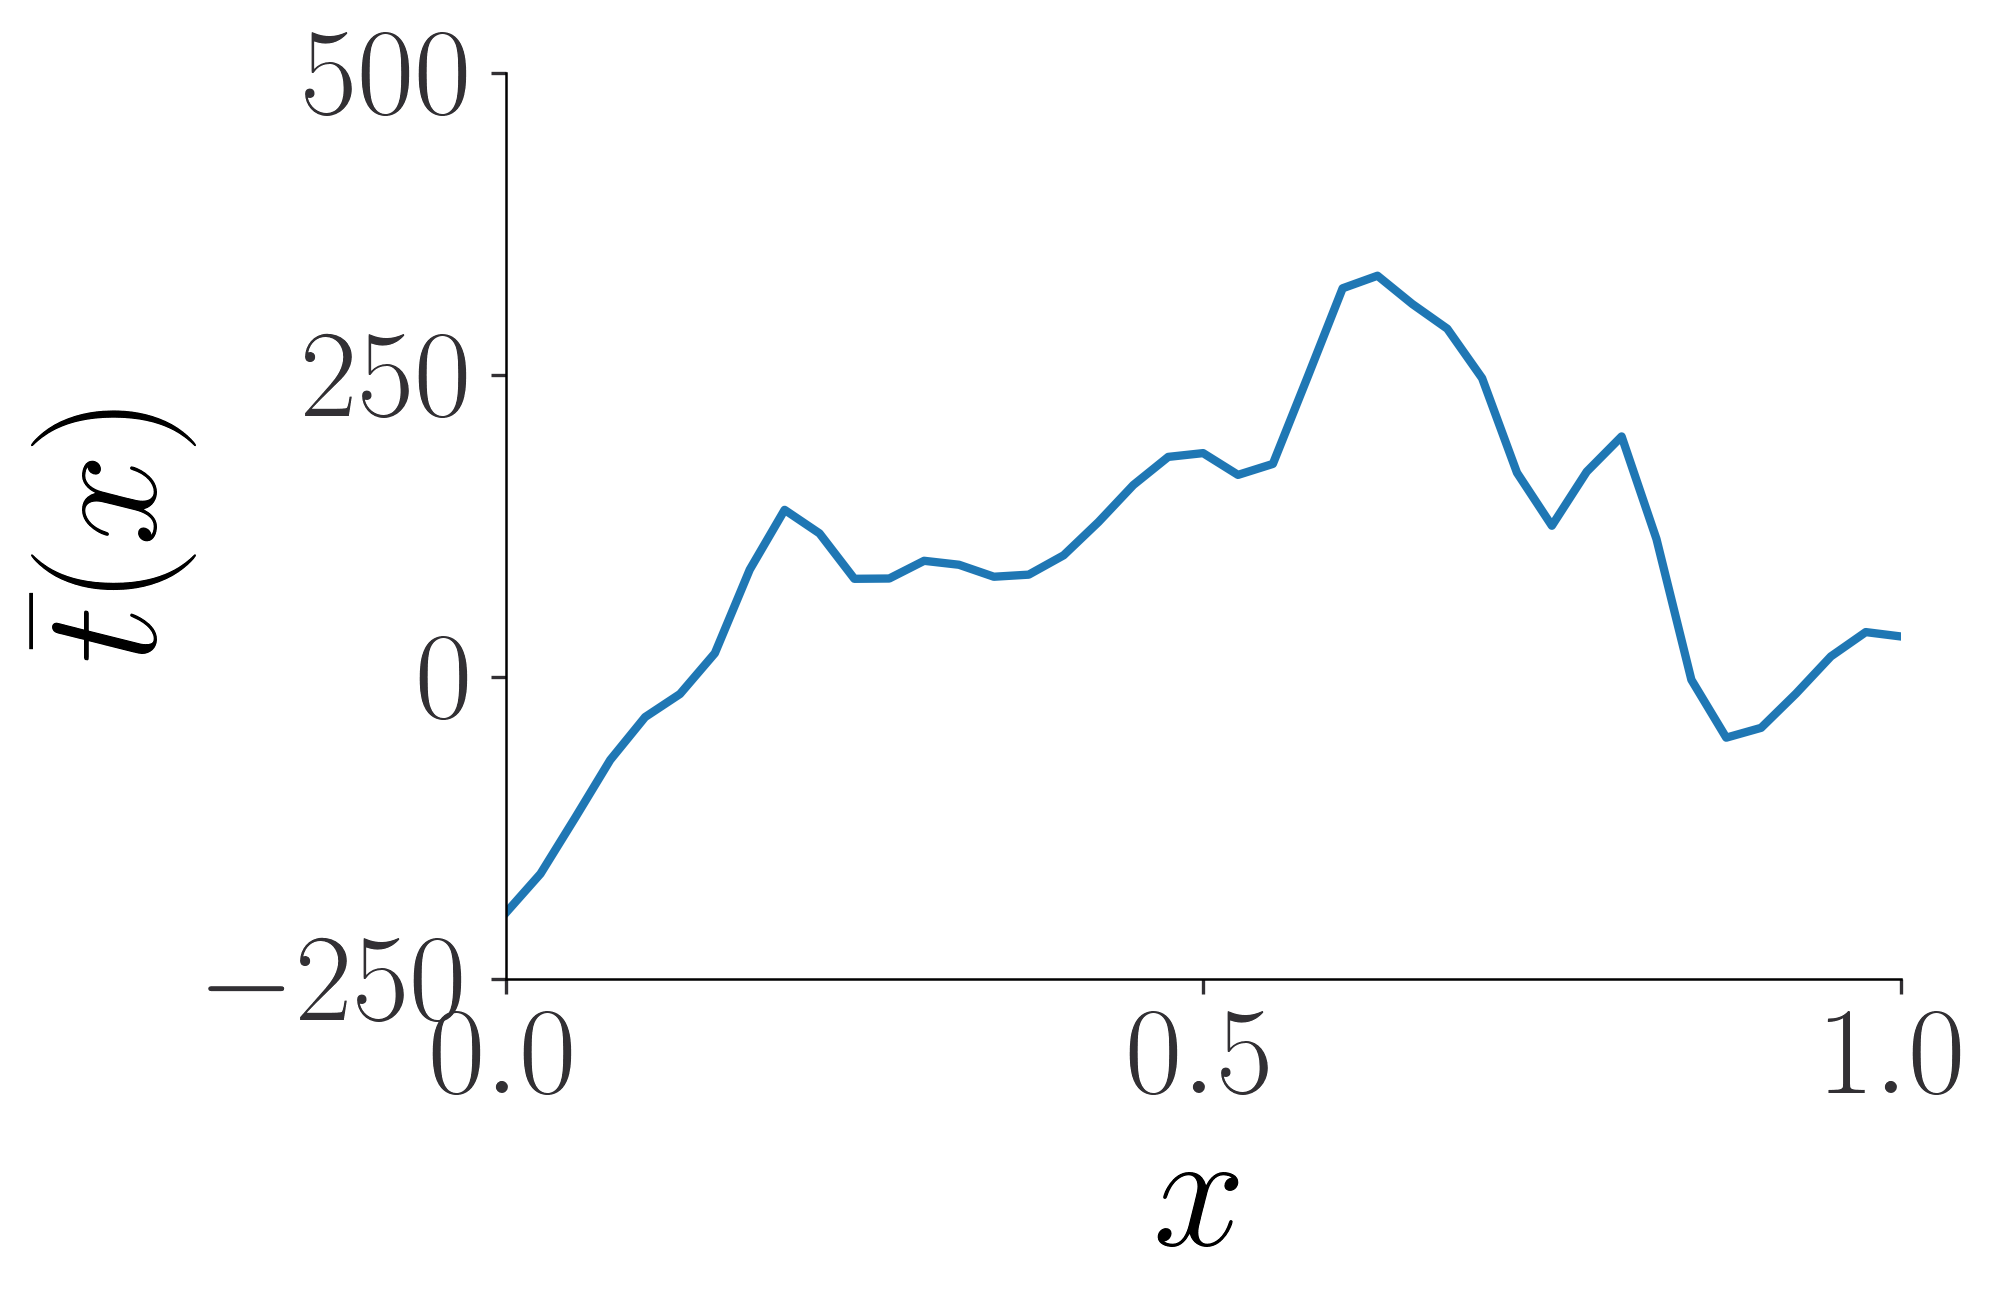

In [75]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x$')
#fig.suptitle(r'Input, Stuctural Mechanics')
ax.set_ylabel(r'$\bar{t}(x)$')
#s = ax.imshow(Input2D, extent=(0,1,0,1), origin = 'lower')
ax.plot(np.linspace(0,1,41),Input2D[:,0])
ax.set_xlim(0,1)
plt.savefig('InputStructural.pdf')

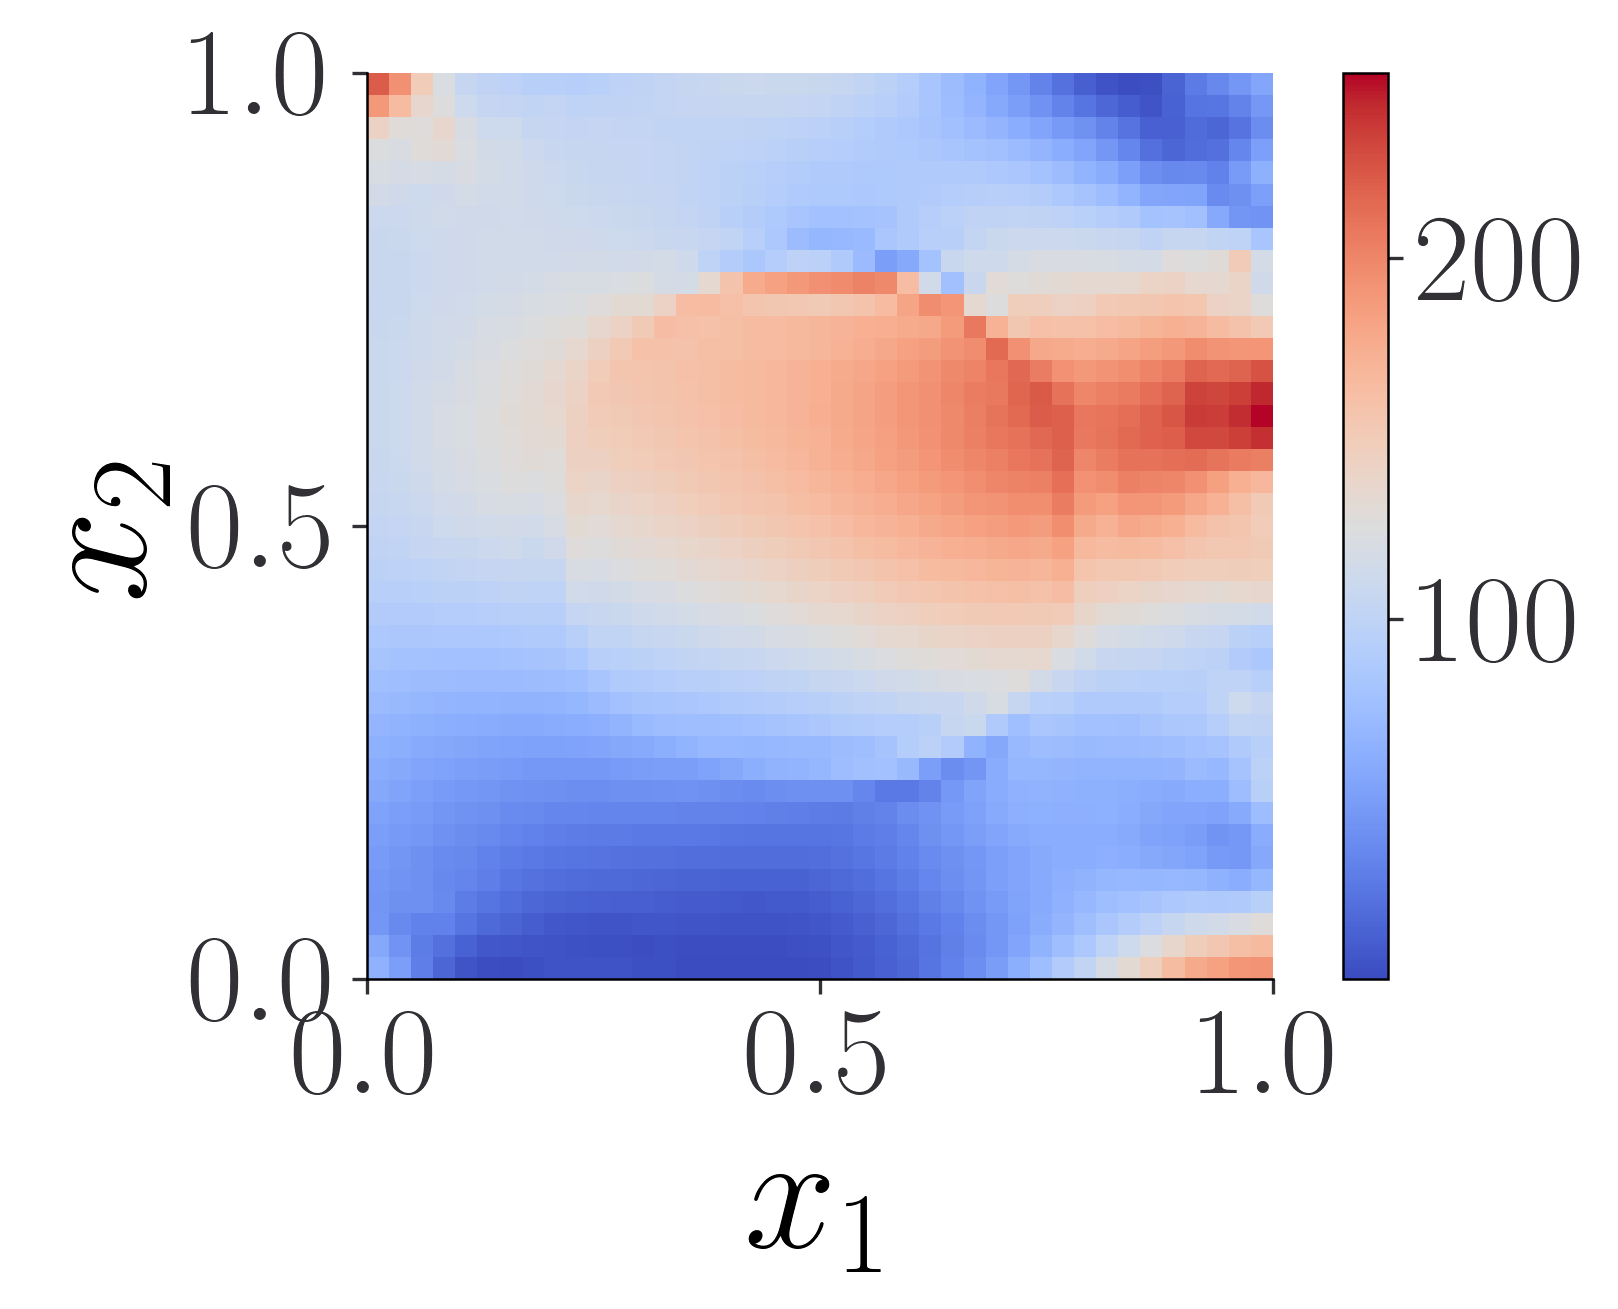

In [76]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Output, Stuctural Mechanics')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Output2D, extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('OutputStructuralMechanics.pdf')

In [77]:
Ytest, Ypred = pickle.load(open('PredictedSM.pkl', 'rb'))

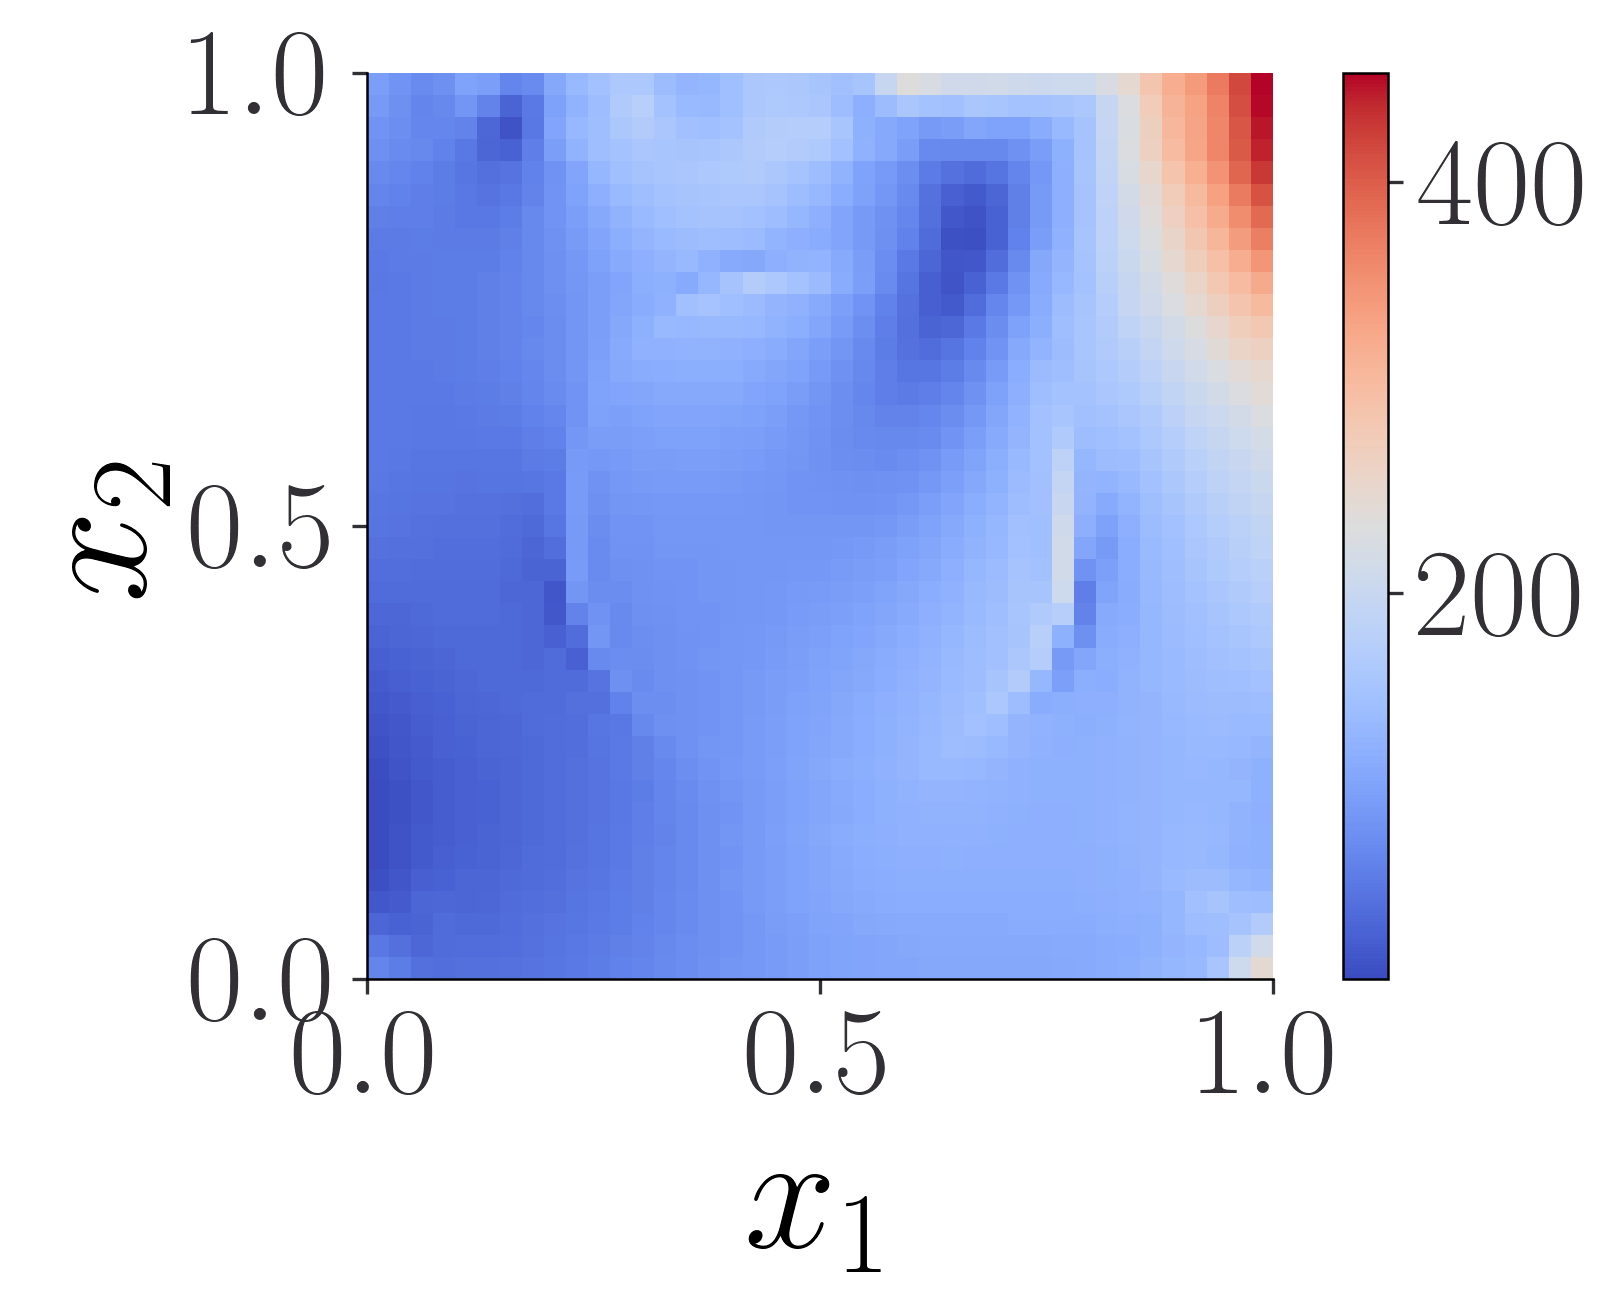

In [78]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'True, Structural Mechanics')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ytest.reshape(41,41), extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('TrueMechanics.pdf')

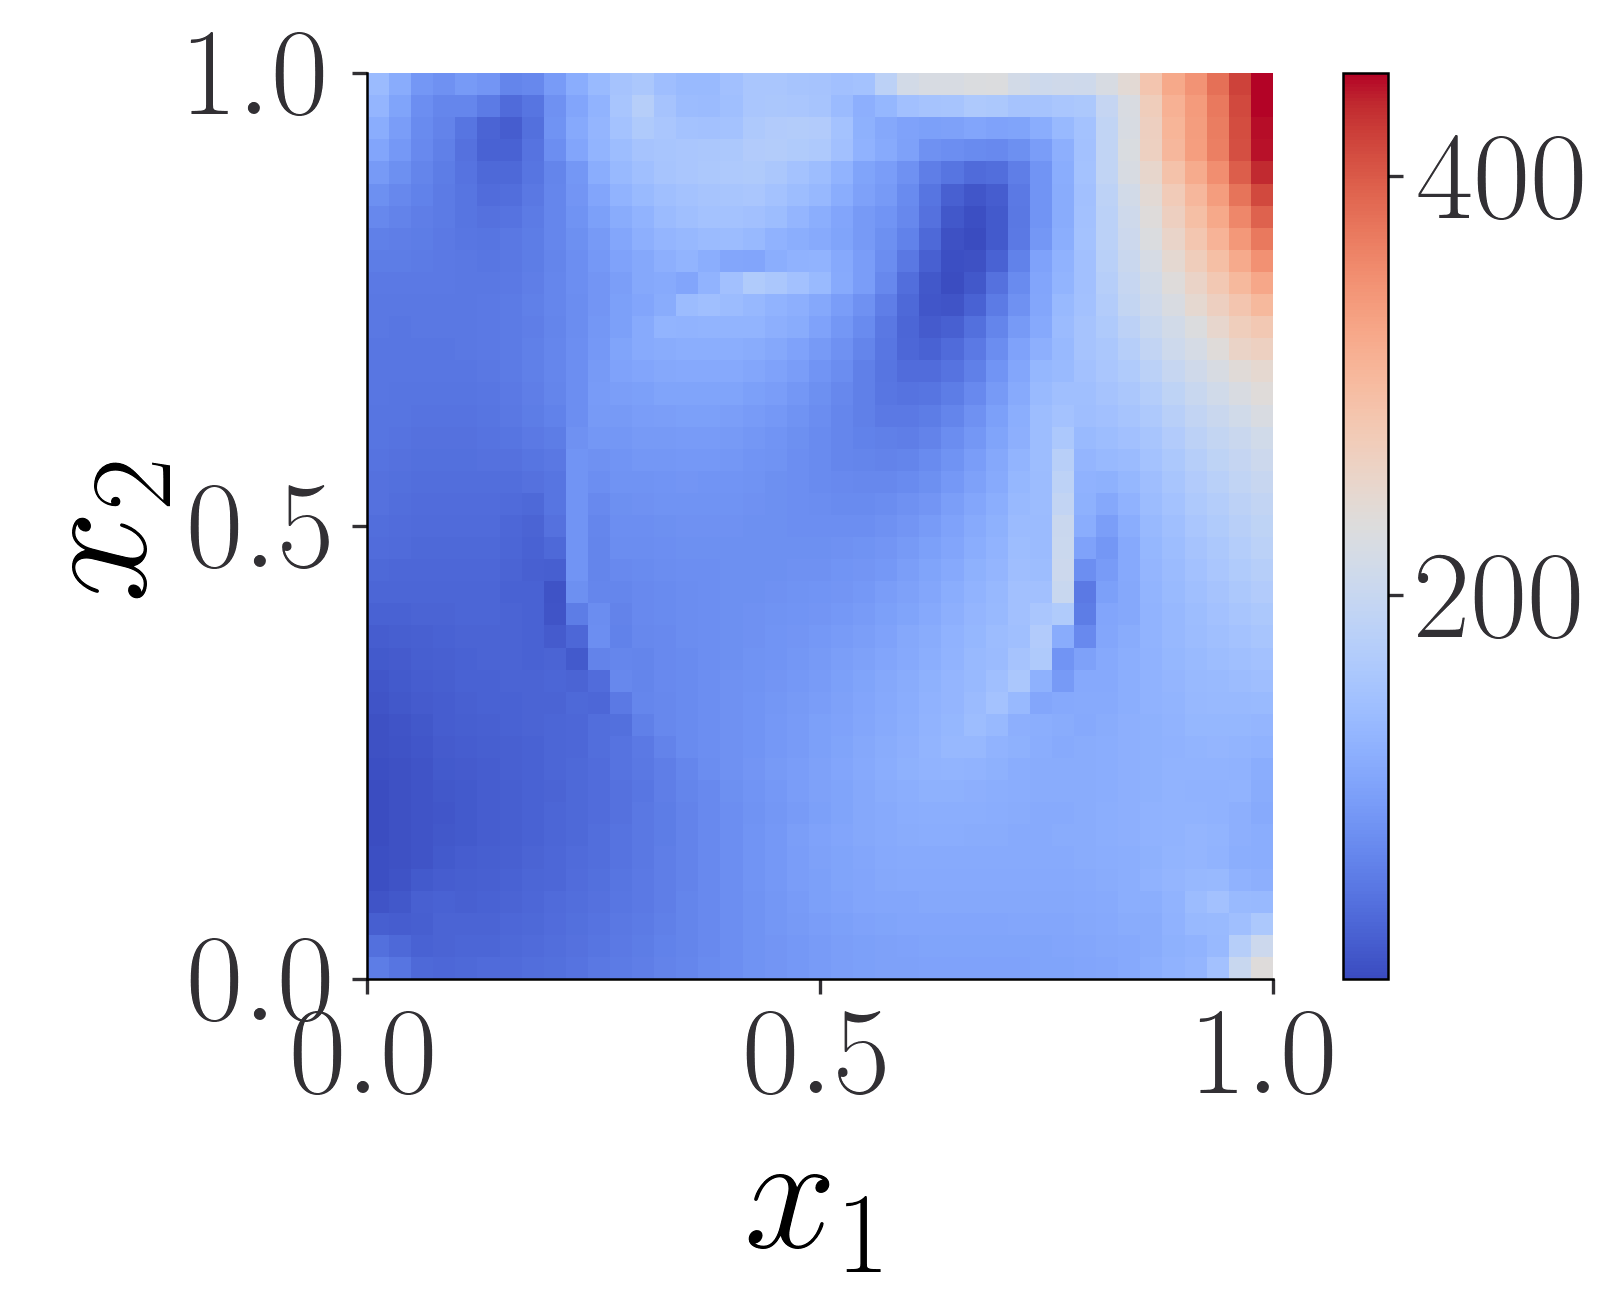

In [79]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Predicted, Structural Mechanics')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ypred.reshape(41,41), extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('PredictedMechanics.pdf')

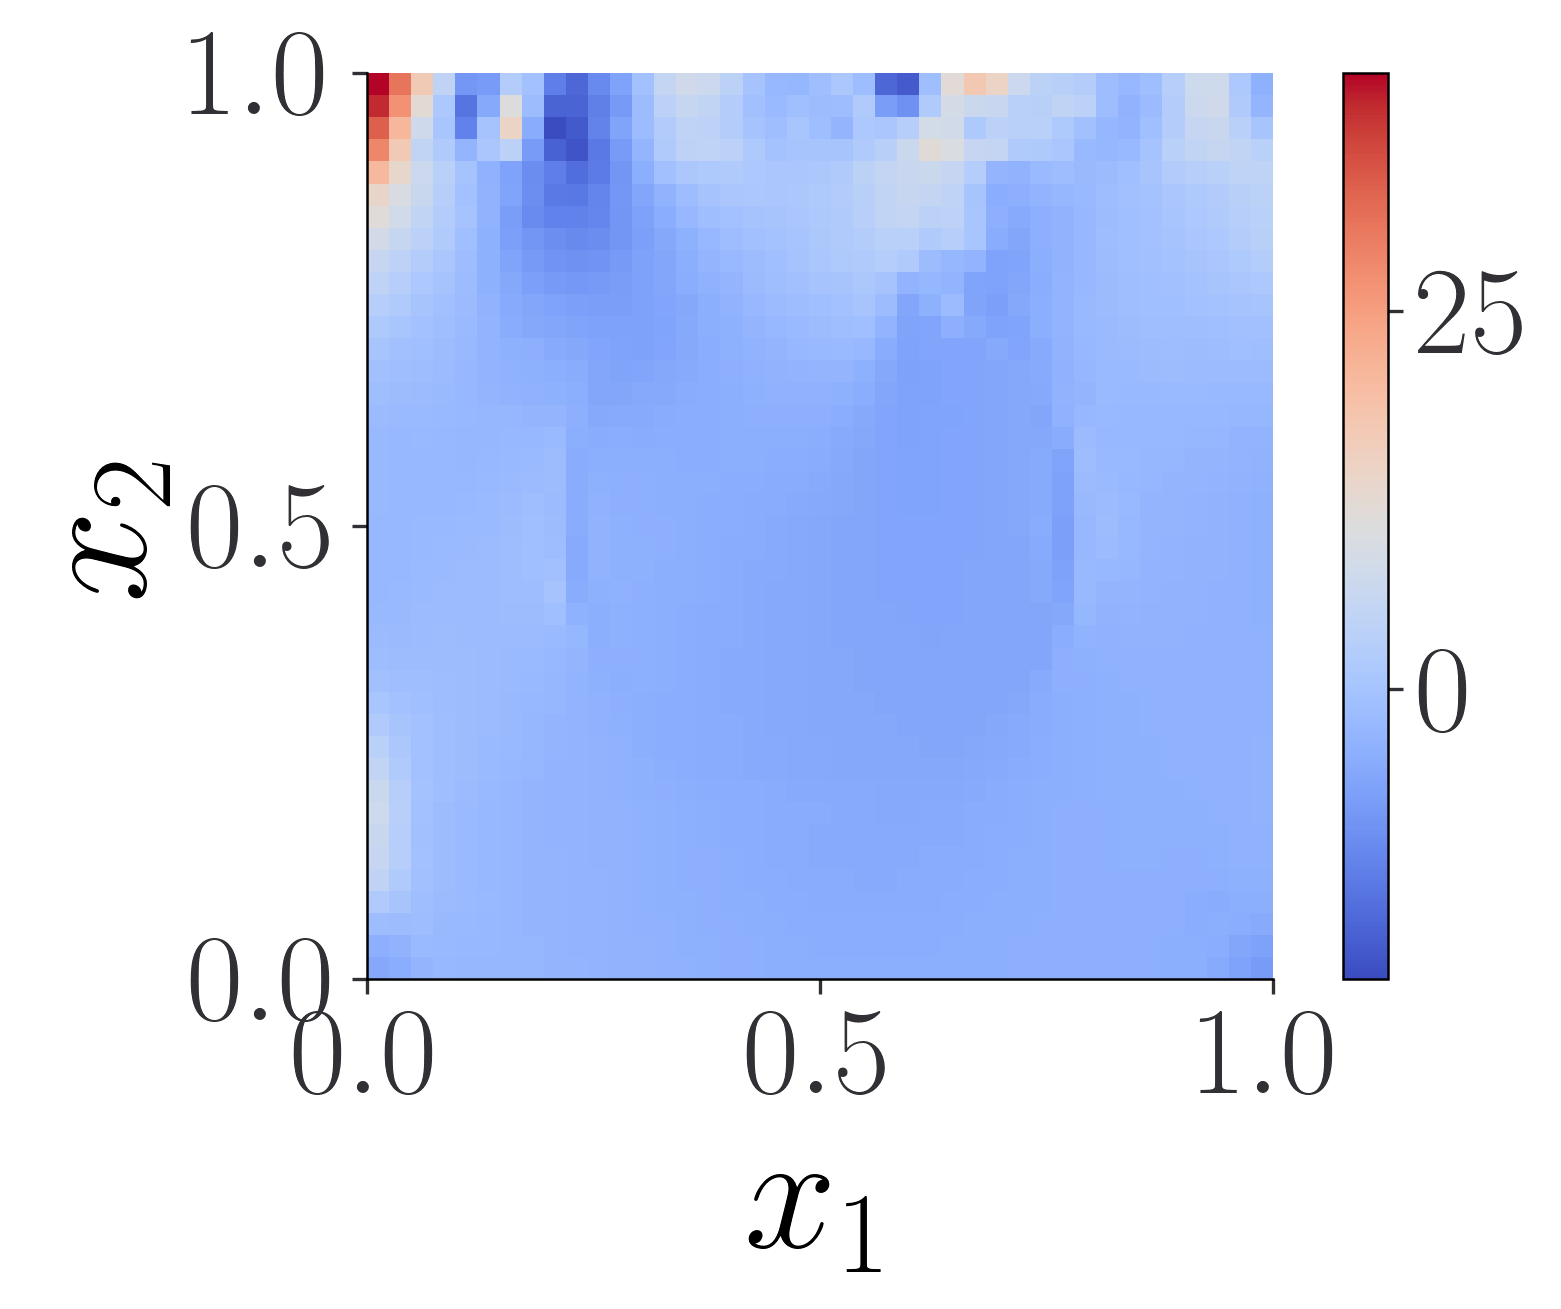

In [80]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Error profile, Structural Mechanics')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ypred.reshape(41,41)-Ytest.reshape(41,41), extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('ErrorMechanics.pdf')

In [81]:
#Helmholtz

In [82]:
Input2D = np.load('data/Helmholtz_inputs.npy')[:,:,4]
Output2D = np.load('data/Helmholtz_outputs.npy')[:,:,4]

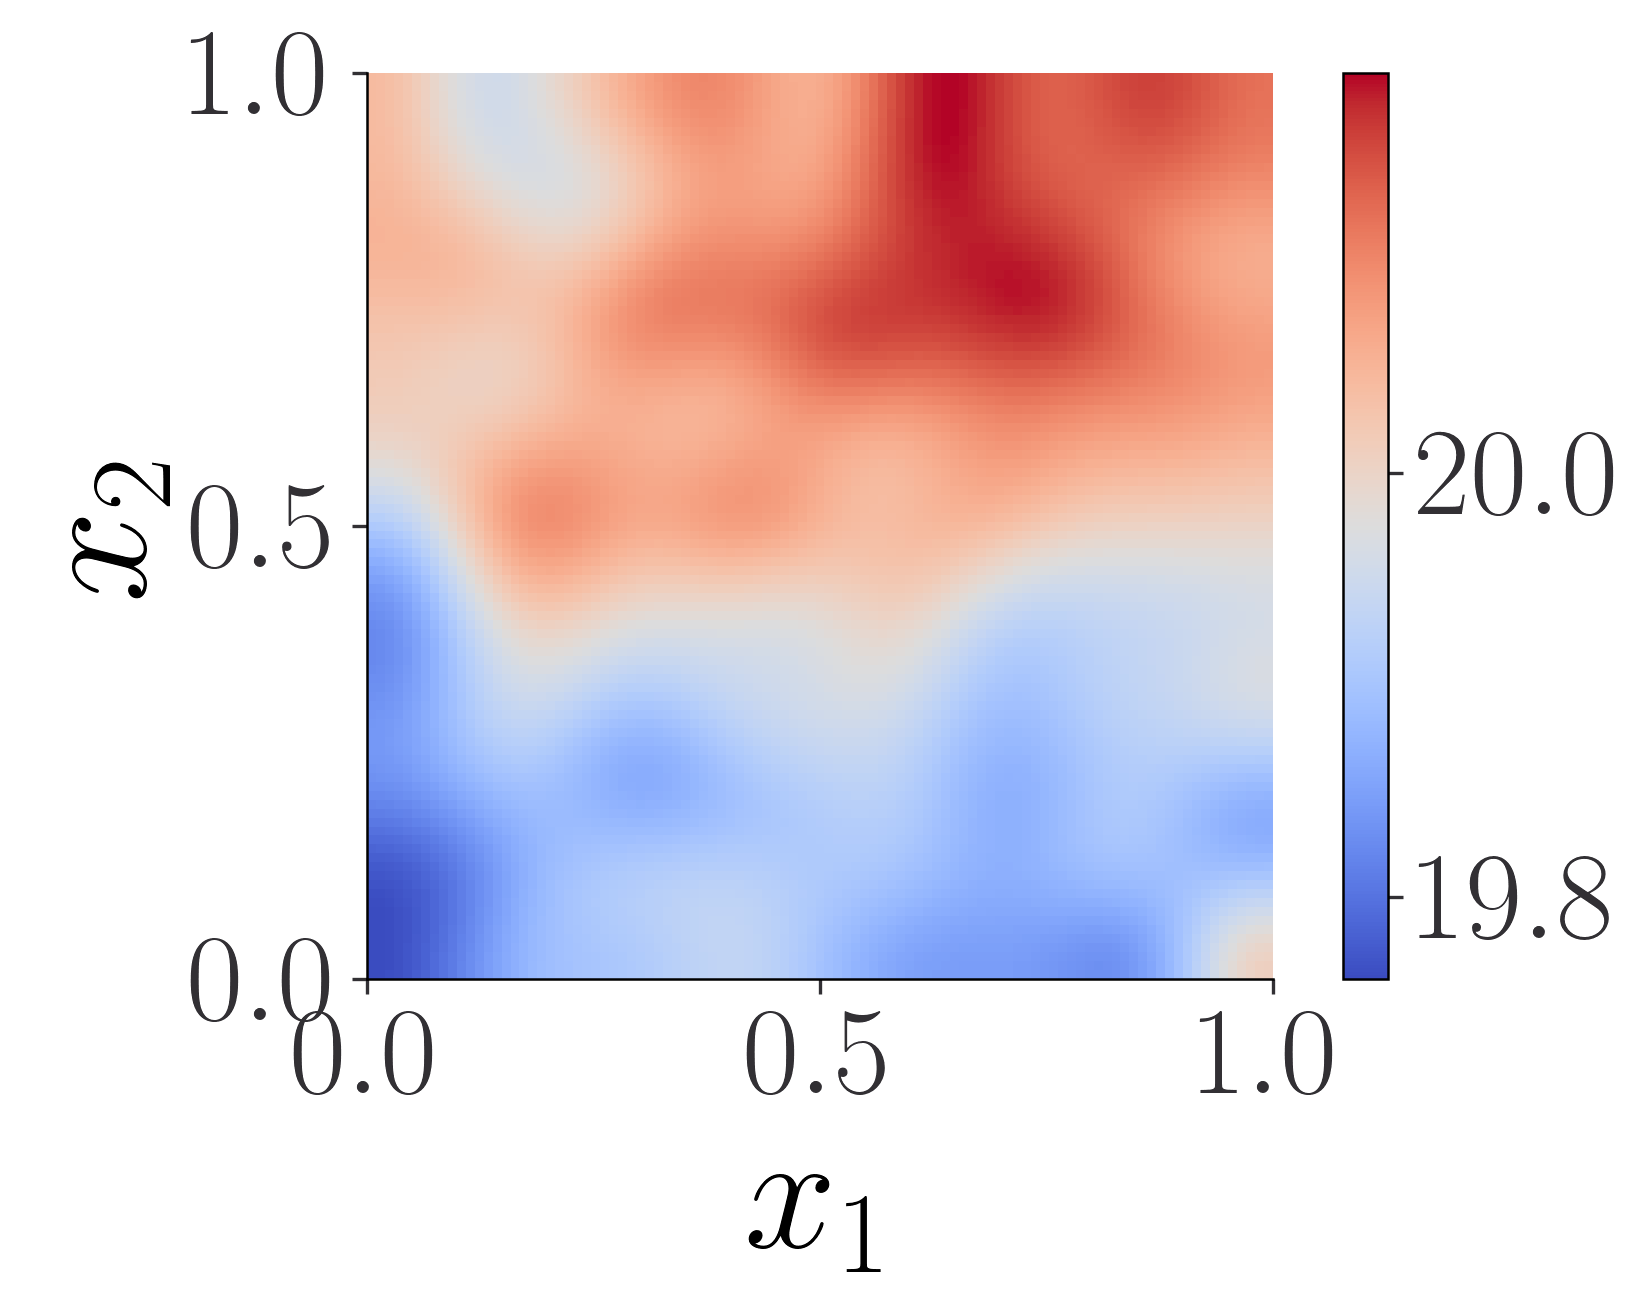

In [83]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Input, Helmholtz')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Input2D, extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('InputHelmoltz.pdf')

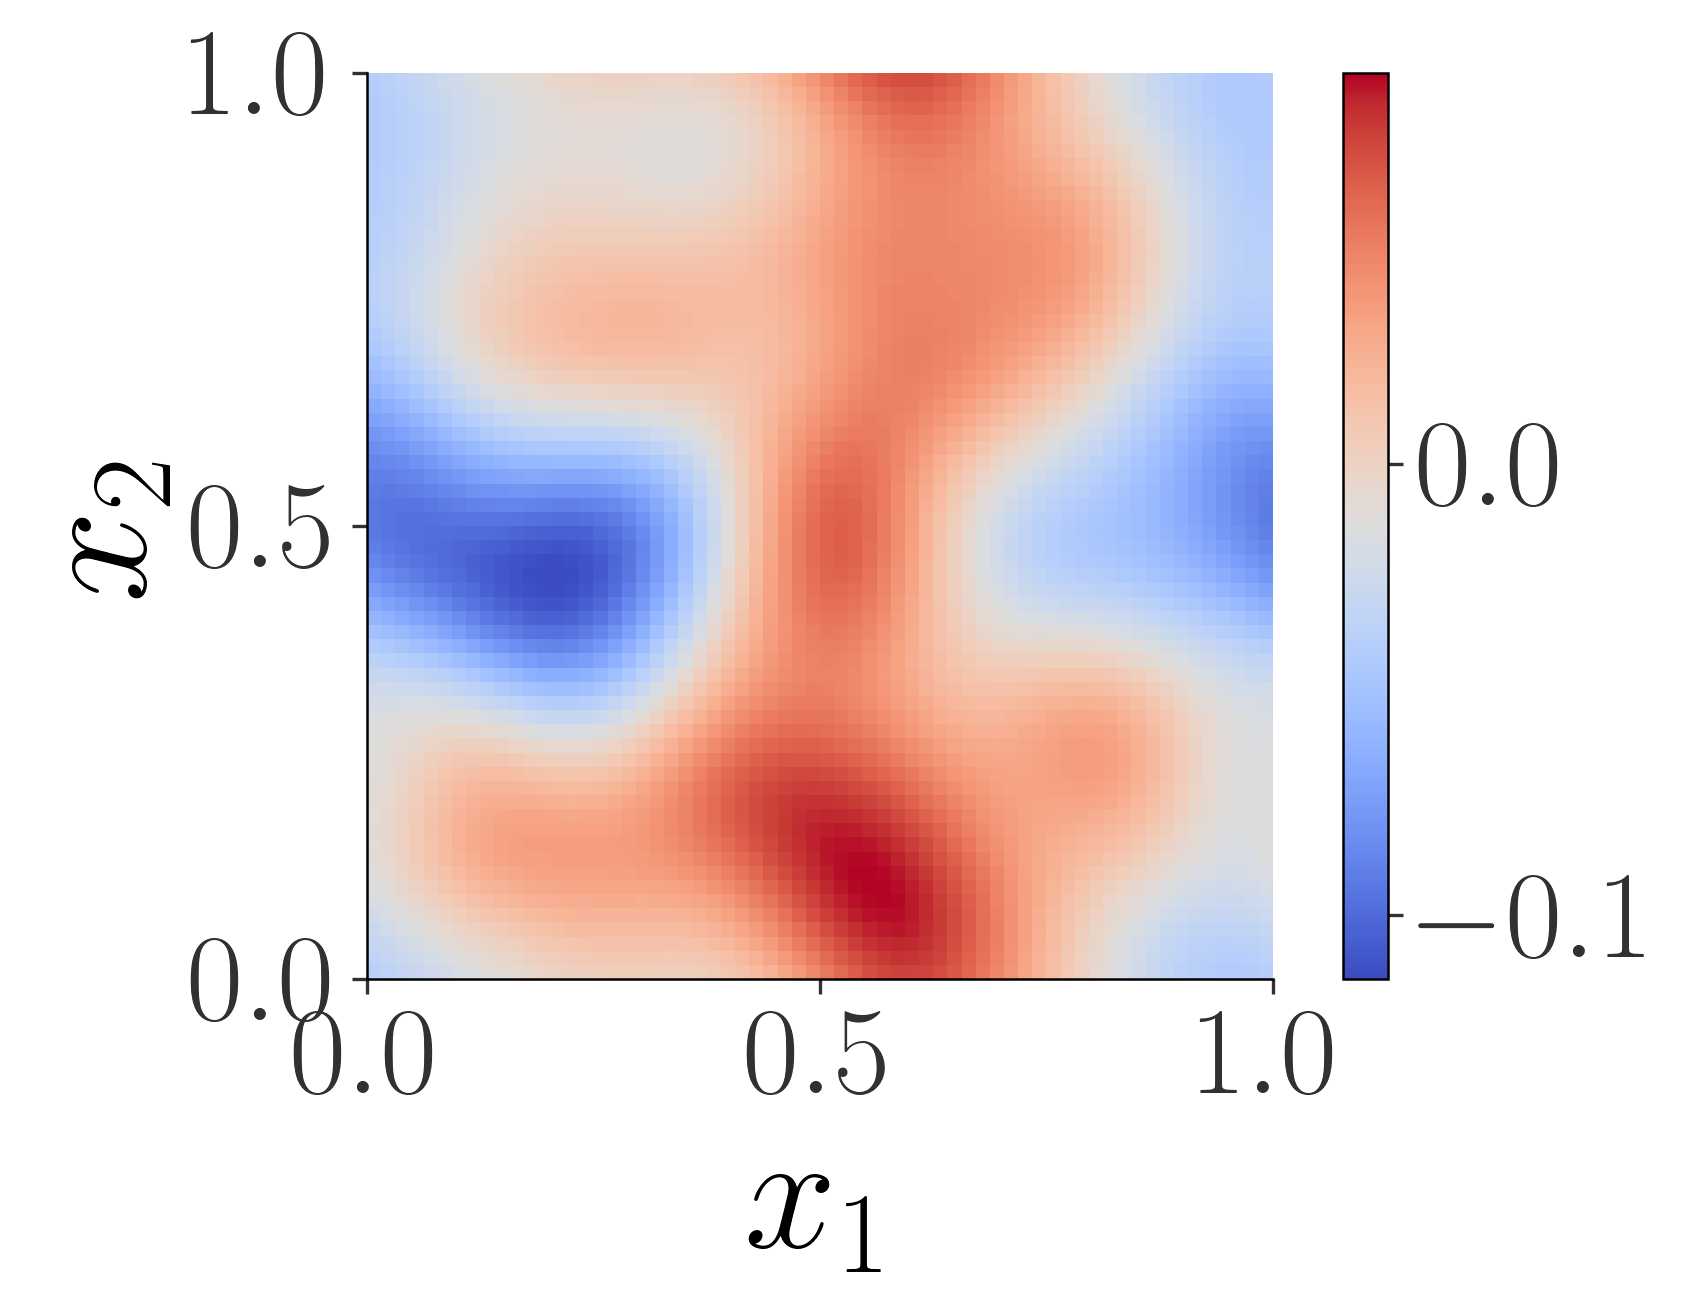

In [88]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Output, Helmholtz')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Output2D, extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('OutputHelmholtz.pdf')

In [89]:
Ytest, Ypred = pickle.load(open('PredictedHH.pkl', 'rb'))

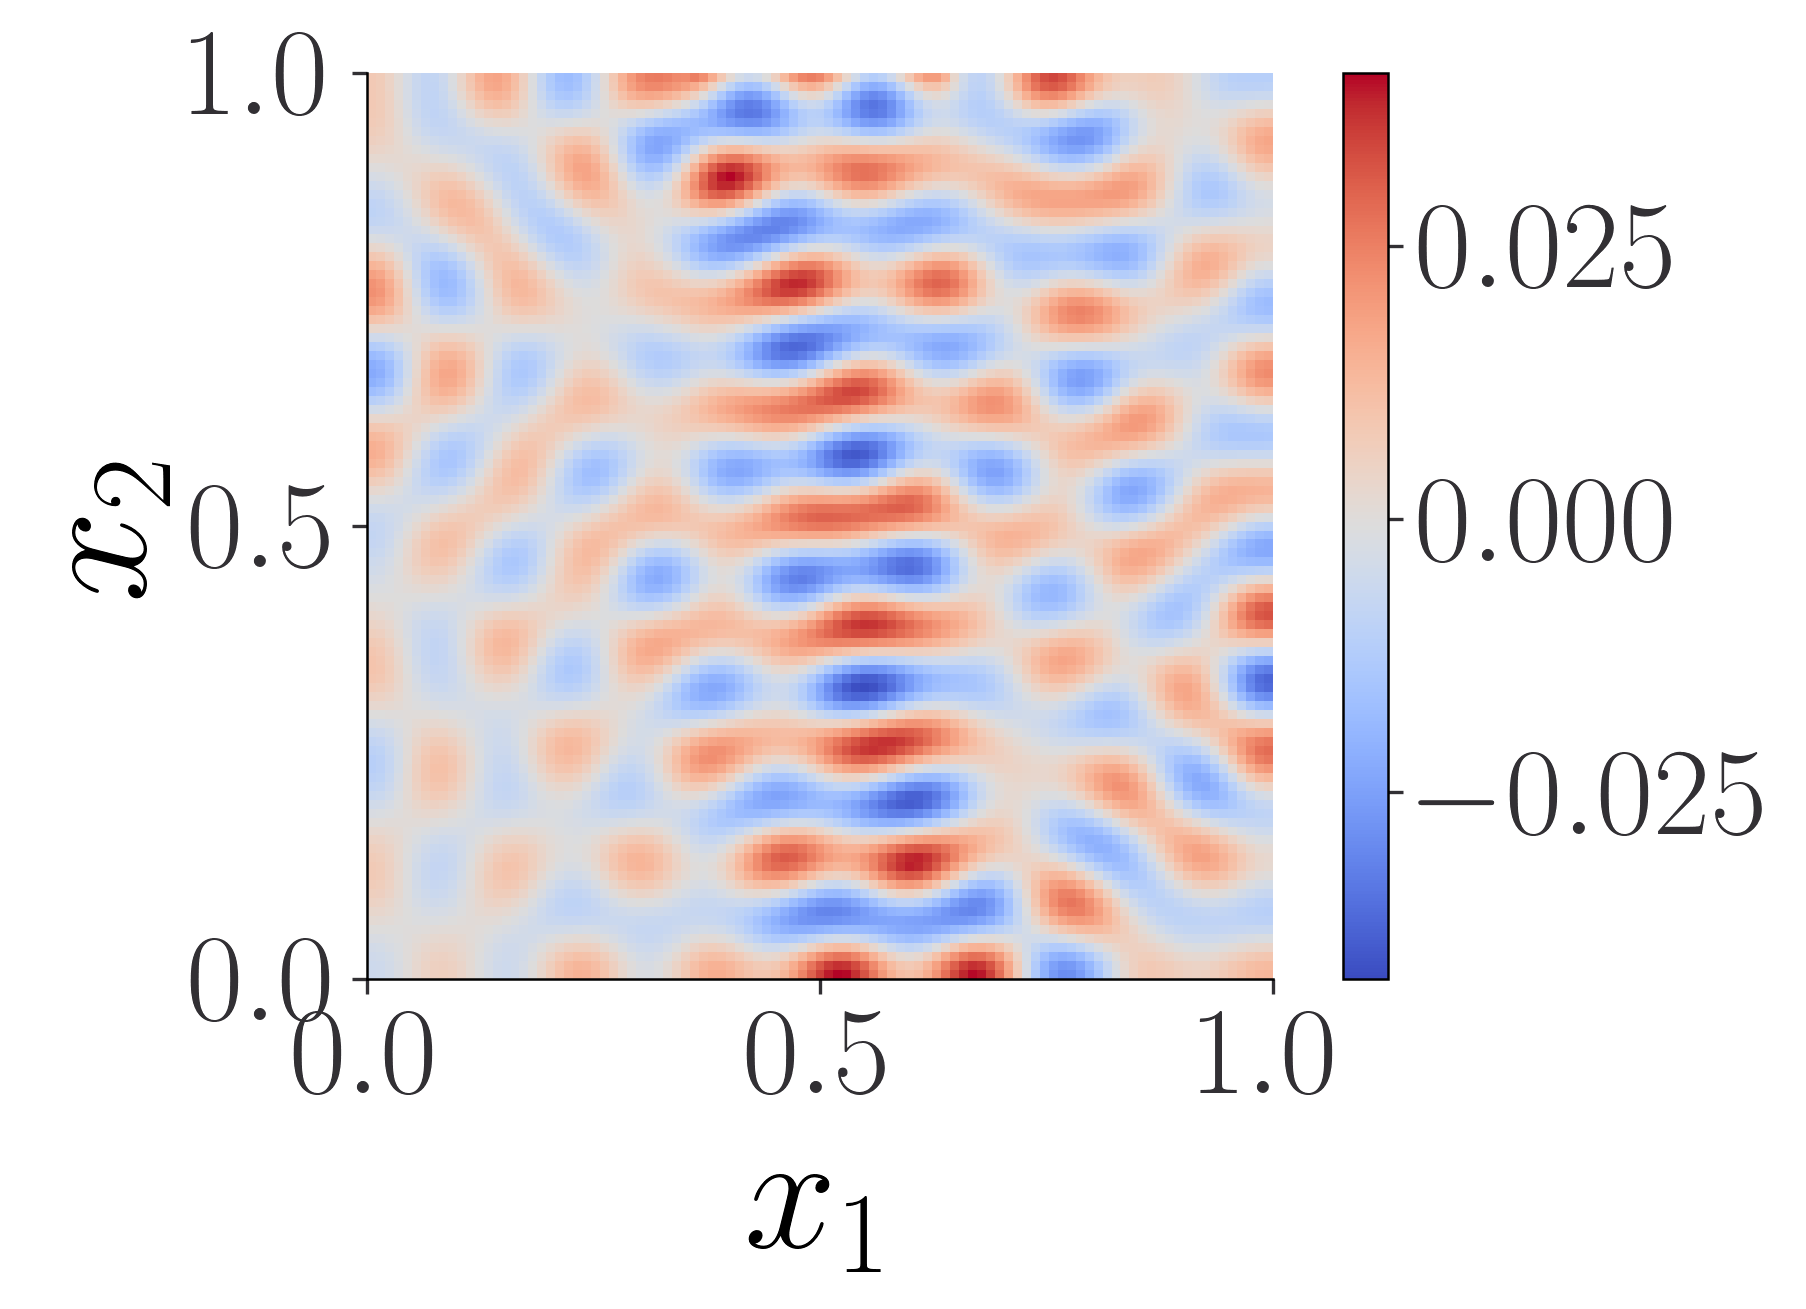

In [90]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'True, Helmholtz')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ytest.reshape(101,101), extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('TrueHelmholtz.pdf')

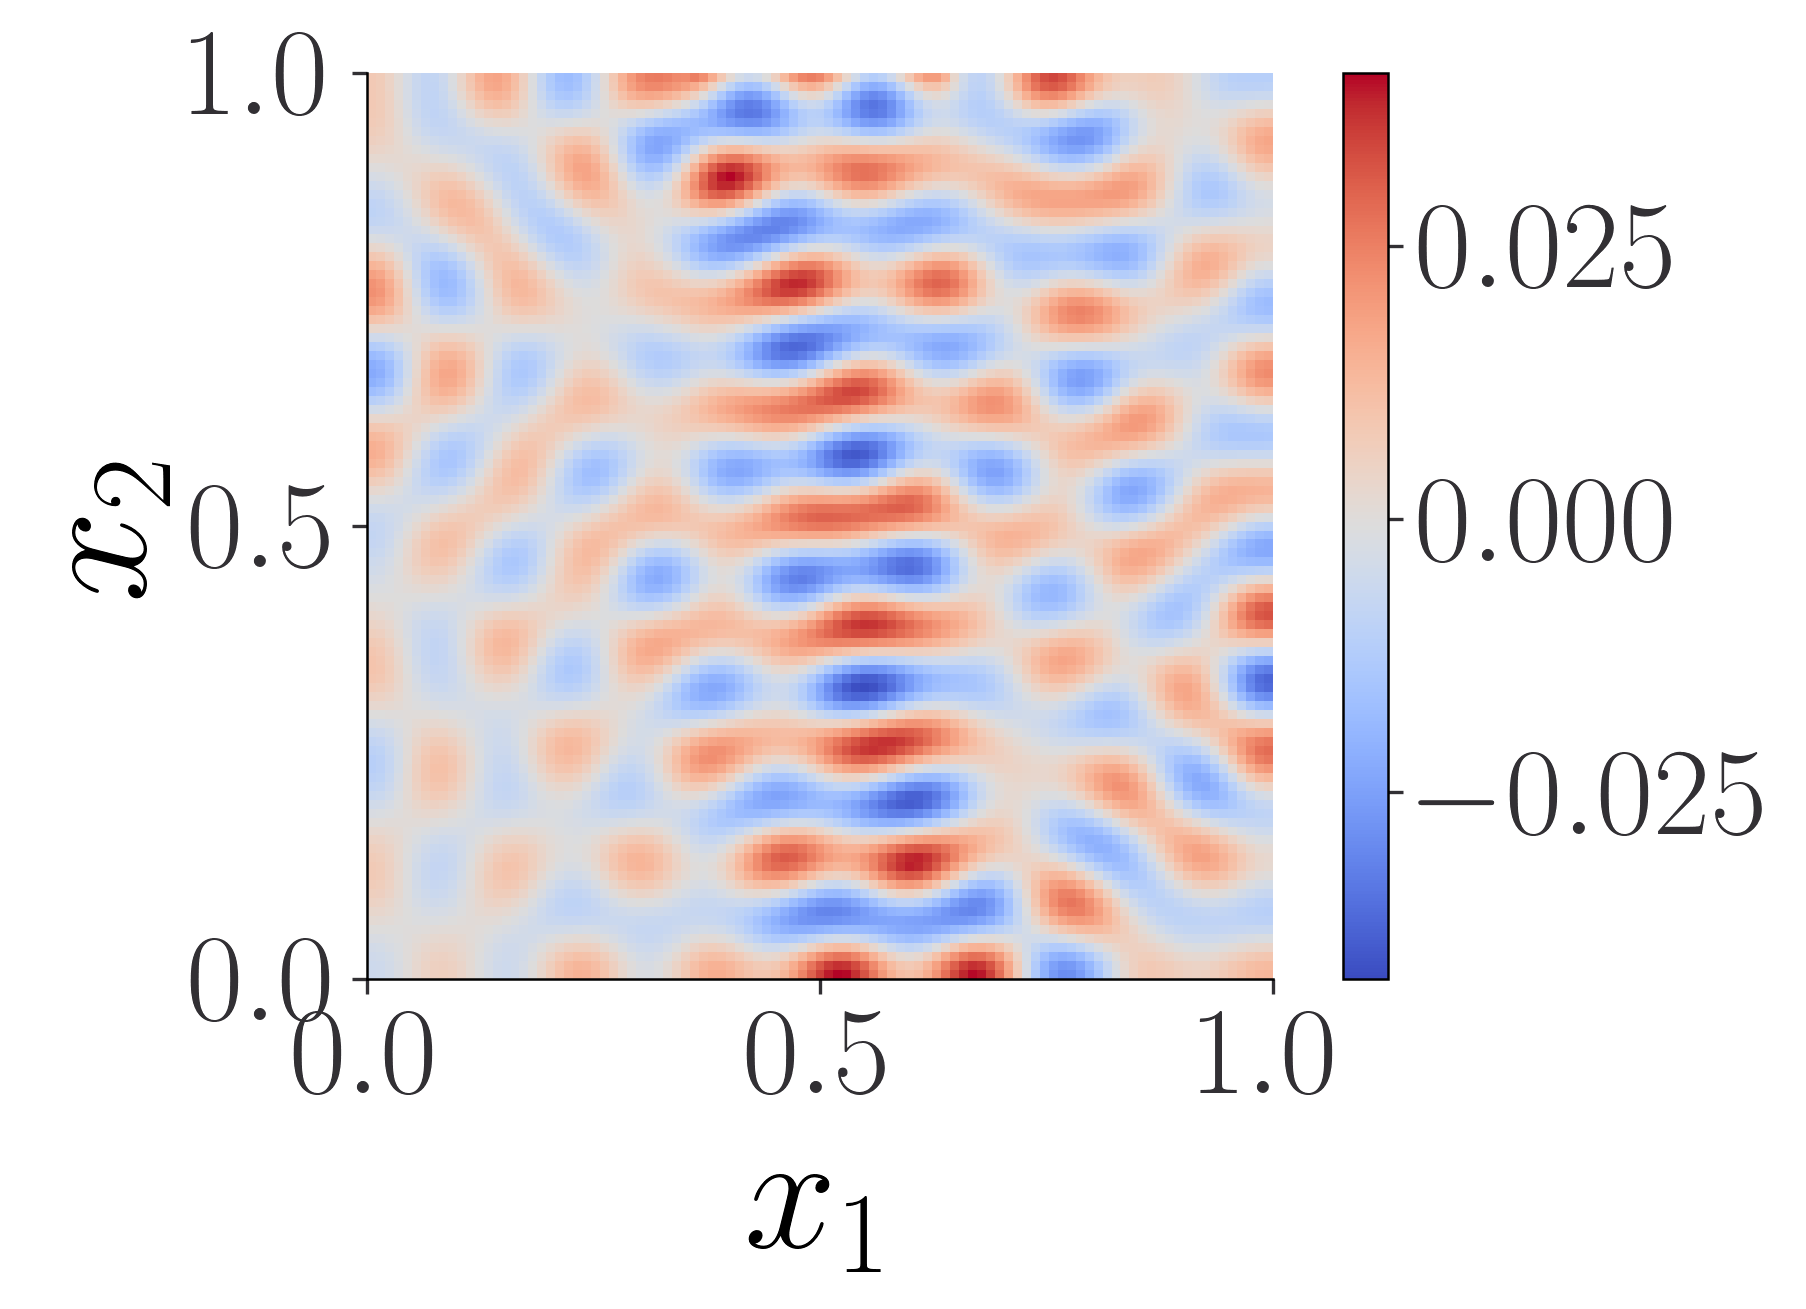

In [91]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Predicted, Helmholtz')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ytest.reshape(101,101), extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('PredictedHelmholtz.pdf')

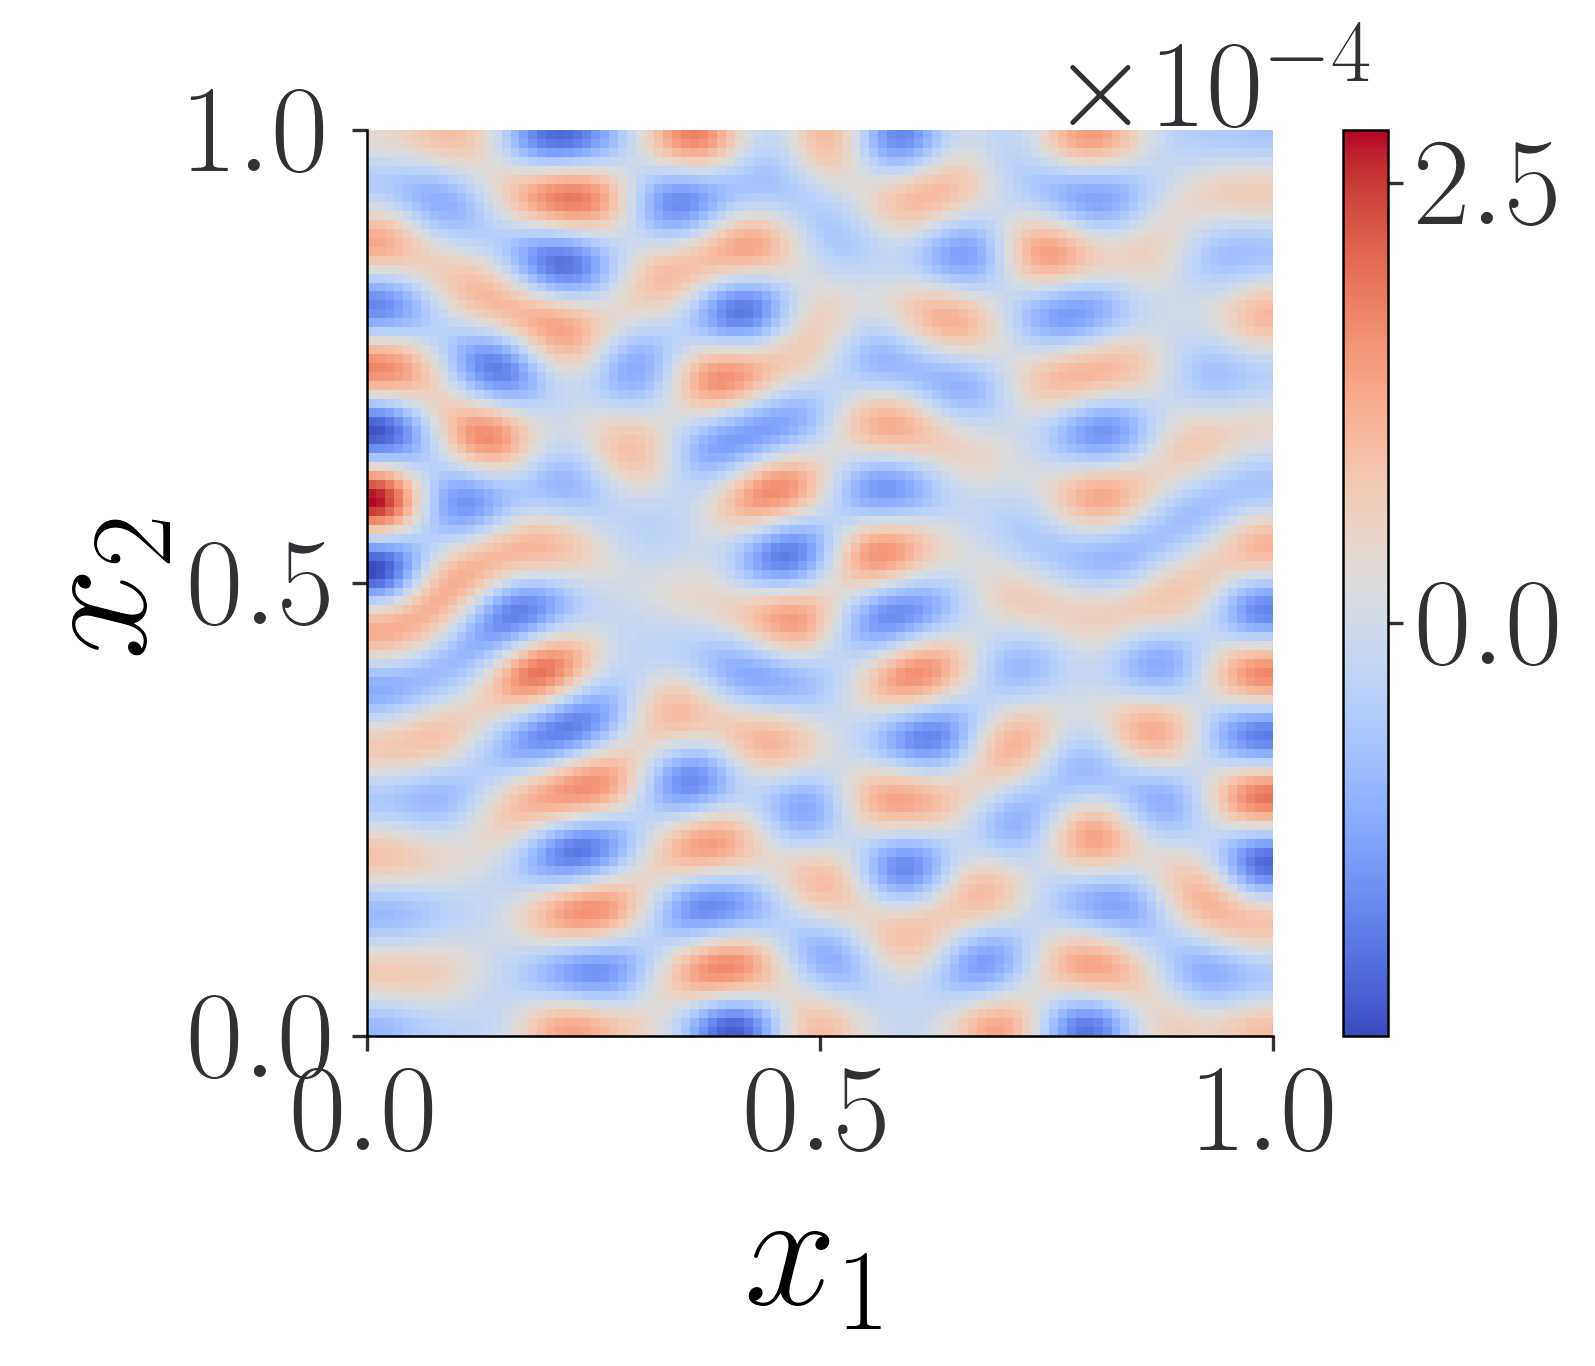

In [92]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel(r'$x_1$')
#fig.suptitle(r'Error profile, Helmholtz')
ax.set_ylabel(r'$x_2$')
s = ax.imshow(Ypred.reshape(101,101)-Ytest.reshape(101,101), extent=(0,1,0,1), origin = 'lower')
fig.colorbar(s)
plt.savefig('ErrorHelmholtz.pdf')